# Исследование данных о различных играх

**Описание данных**
В нашем распоряжении есть исторические данные о проданных играх для различных игровых платформ в трёх регионах - Северная Америка, Европа, Япония, а также в других странах.  Данные включают в себя оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), год выпуска, продажи в каждом отдельном из представленных регионов, отдельно продажи в других странах, а также рейтинг ESRB. Данные взяты из открытых источников, рассматриваемый период 1980 - 2016 гг.

**План работы**
* Изучить общую информацию об имеющихся данных;
* Сделать предобработку данных (найти и изучить пропущенные данные, заполнить пропуски, где это возможно, удалить явные и неявные дубликаты, устранить редкие и выбивающиеся значения);
* Добавить в таблицу новые столбцы с необходимыми для проведения анализа ключевыми данными;
* Провести исследовательский анализ данных (изучить параметры данных, посмотреть, какие факторы влияют на финальные продажи игры; 
* Составить портрет пользователя каждого региона (NA, EU, JP);
* Проверить две гипотезы, а именно: средние пользовательские рейтинги платформ Xbox One и PC одинаковые, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Написать общий вывод;

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    forsen = pd.read_csv('C:/Users/Games/Downloads/games.csv')
except:
    forsen = pd.read_csv('/datasets/games.csv')

forsen.info()
display(forsen.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Предобработка данных

Заменим значения столбцов в датасете на более приемлемые, т.е. с нижним регистром.

In [3]:
forsen.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release' : 'year_of_release',
              'Genre' : 'genre', 'NA_sales' : 'na_sales', 'EU_sales' : 'eu_sales', 'JP_sales' : 'jp_sales',
              'Other_sales' : 'other_sales', 'Critic_Score' : 'critic_score', 'User_Score' : 'user_score', 
              'Rating' : 'rating'}, inplace=True)

In [4]:
forsen.info()
print(forsen['user_score'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '

Названия столбцов были успешно изменены.
Преобразуем данные некоторых столбцов в нужные типы. В столбце с датой выхода игры сейчас стоит тип данных float64. Преобразуем в datetime. Столбец с оценкой игроков имеет тип данных object, преобразуем его в float. Более того, в уникальных значениях столбца есть аббревиатура 'tbd' (предполагаю, что это to be determined), т.е. оценка ещё неизвестна. Эти значения мы преобразуем принудительно в NaN с помощью pd.to_numeric, errors = 'coerce'. 
Типы данных оставшихся столбцов нас устраивают, уточним, что рейтинг от организации ESRB (столбец 'rating') имеет буквенные значения, т.е. тип object ему подойдет.

Сразу же удалим малочисленные строки с пропусками, например 269 строк с неизвестной датой выхода игры, или же 2 строки с неизвестным жанром игры и названием.

In [5]:
forsen['user_score'] = pd.to_numeric(forsen['user_score'], errors = 'coerce')
forsen = forsen.dropna(subset=['year_of_release', 'genre', 'name'])

In [6]:
forsen['year_of_release'] = forsen['year_of_release'].astype('int64')

In [7]:
forsen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [8]:
display(forsen.head())
forsen.info()
display(forsen['platform'].unique())
display(forsen['genre'].unique())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Мы удалили 271 строку из датасета, что является 1,6% от всего кол-ва строк в данных.
Проверим датасет на наличие дубликатов, а также факт того, что нам удалось преобразовать 'tbd' в NaN.

In [9]:
print('Дубликатов в датасете:', forsen.duplicated().sum())
print('-------------------------------------------------------------------------')
print(forsen['user_score'].unique())

Дубликатов в датасете: 0
-------------------------------------------------------------------------
[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


Проверим также датасет на наличие неявных дубликатов, и, если потребуется, примем решение по их обработке. 

In [10]:
forsen['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [11]:
forsen['name'].value_counts()

Need for Speed: Most Wanted     12
FIFA 14                          9
LEGO Marvel Super Heroes         9
Ratatouille                      9
FIFA Soccer 13                   8
                                ..
Mighty Beanz: Pocket Puzzles     1
Otomedius Gorgeous               1
Zatch Bell! Mamodo Fury          1
Mega Man & Bass                  1
Puyo Pop                         1
Name: name, Length: 11426, dtype: int64

In [12]:
forsen['name'] = forsen['name'].str.lower()

In [13]:
forsen['name'].value_counts()

need for speed: most wanted                12
fifa 14                                     9
lego marvel super heroes                    9
ratatouille                                 9
monopoly                                    8
                                           ..
the sky crawlers: innocent aces             1
endgame                                     1
trap gunner: countdown to oblivion          1
super robot taisen: original generation     1
nba shootout 2003                           1
Name: name, Length: 11426, dtype: int64

In [14]:
forsen['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983], dtype=int64)

Проверка на неявные дубликаты прошла успешно, названия платформ не повторяются, занесены в датасет корректно, дублирующих названий одной платформы не обнаружено, также на всякий случай мы привели названия игр к нижнему регистру, кол-во строчек с названиями не изменилось.

Вернёмся к пропускам. Они остались в трёх столбцах: оценка критиков, оценка игроков и оценка рейтингового агентства ESRB. Удалить эти строки не представляется возможным, т.к. в этом случае будет удалено >50% данных датасета. Однако, по моему мнению, заполнять эти пропуски тоже нельзя, так как каждая игра индивидуальна, заполнить средним или медианным значением не получится. Аналогично и с оценкой ESRB. Оставим эти пропуски нетронутыми.

**Возможные причины появления пропусков**  
Пропуски в столбцах с информацией о пользовательских оценках или оценках критиков появиться в результате отсутствия на момент выхода той или иной игры соответствующих площадок для, собственно, размещения этих оценок, или же просто случайностью, забывчивостью заполнения данных.  
Что касается пропусков в столбце ESRB, то помимо вышеперечисленного, вероятной причиной наличия пропусков является тот факт, что создано агентство было в 1994 году, и присваивает рейтинги оно на территории Канады, США и Мексики.

Посчитаем суммарные продажи каждой игры (в миллионах) во всех регионах и запишем их в отдельный столбец 'total_sales'.

In [15]:
forsen['total_sales'] = forsen['na_sales'] + forsen['eu_sales'] + forsen['jp_sales'] + forsen['other_sales']
display(forsen.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

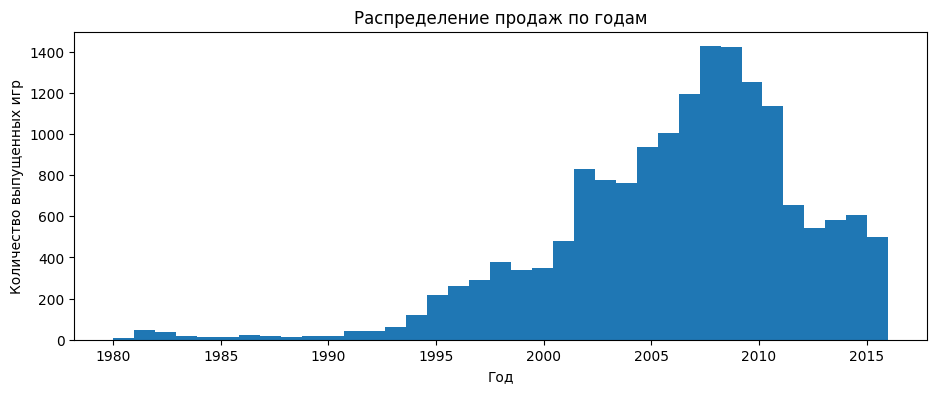

In [16]:
forsen['year_of_release'].plot(kind='hist', bins=37, figsize=(11,4))
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.title('Распределение продаж по годам')
plt.show()

In [17]:
display(forsen.query('year_of_release > 1997'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [18]:
display(forsen.query('year_of_release == 2006'))
display(forsen.query('year_of_release == 2008'))
display(forsen.query('year_of_release == 2009'))
display(forsen.query('2012 <= year_of_release <= 2016'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
20,pokemon diamond/pokemon pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
107,the legend of zelda: twilight princess,Wii,2006,Action,3.74,2.14,0.60,0.68,95.0,9.0,T,7.16
...,...,...,...,...,...,...,...,...,...,...,...,...
16632,style book: cinnamoroll,DS,2006,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16636,deal or no deal,PC,2006,Misc,0.00,0.01,0.00,0.00,NaN,7.5,E,0.01
16661,bookworm deluxe,PC,2006,Puzzle,0.01,0.00,0.00,0.00,NaN,8.0,E,0.01
16679,xi coliseum,PSP,2006,Puzzle,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
39,super smash bros. brawl,Wii,2008,Fighting,6.62,2.55,2.66,1.01,93.0,8.9,T,12.84
51,grand theft auto iv,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
57,grand theft auto iv,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
90,pokémon platinum version,DS,2008,Role-Playing,2.76,1.72,2.69,0.54,83.0,8.5,E,7.71
...,...,...,...,...,...,...,...,...,...,...,...,...
16687,neo angelique special,PSP,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16689,real rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16698,mega brain boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48.0,NaN,E,0.01
16704,plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,new super mario bros. wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
15,wii fit plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
36,call of duty: modern warfare 2,X360,2009,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M,13.47
46,pokemon heartgold/pokemon soulsilver,DS,2009,Action,4.34,2.71,3.96,0.76,NaN,NaN,NaN,11.77
...,...,...,...,...,...,...,...,...,...,...,...,...
16650,agatha christie: peril at end house,PC,2009,Adventure,0.00,0.01,0.00,0.00,NaN,NaN,T,0.01
16665,sweet honey coming,PS2,2009,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16690,pony friends 2,PC,2009,Simulation,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16700,mezase!! tsuri master ds,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [19]:
forsen = forsen.query('year_of_release > 1997')

До 1997-го года всего было выпущено 1 528 игр, с учетом удаленных нами строчек ранее. Нам позволительно избавиться максимум от 10% данных датасета (1 671 строка), т.е. чтобы у нас осталось >15 043 строк в исследуемом датасете. 
По моему мнению, для выявления факторов, определяющих успешность игры для разработки в будущем (2017+ год), особо данные ранее ~2010 года не нужны, т.к. сейчас набирают популярность игры на консолях (PS5, Xbox One), в меньшей степени на ПК. Мобильные игры, но их в датасете нет. Более того, игровые тренды меняются примерно каждые 4-6 лет. 
Исходя из вышесказанного, с большой уверенностью можно избавиться от всех данных по играм, выпущенным ранее 1997-го года.
В 2006-м году кол-во выпущенных игр впервые преодолело отметку в 1 000 ед. В 2008-м и 2009-м гг. было выпущенно максимальное кол-во игр - 1 427 и 1 426 соответственно. В период с 2012 по 2016 г. включительно, было выпущено 2 886 игр.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

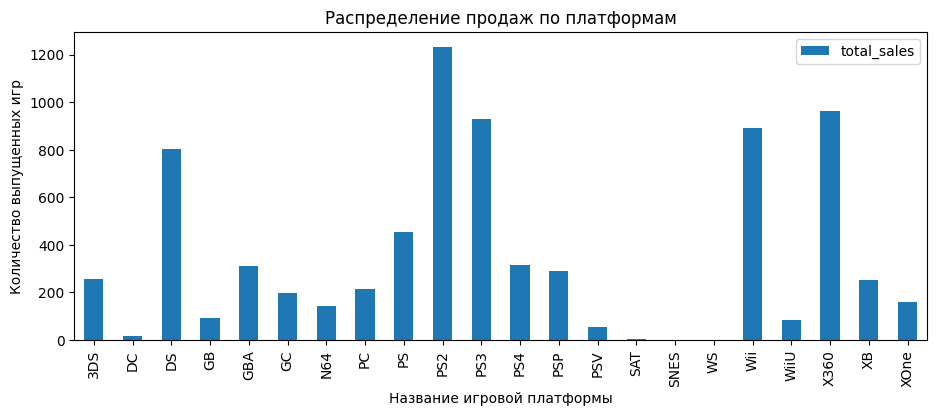

In [20]:
forsen2 = forsen.pivot_table(index='platform', values='total_sales', aggfunc='sum')

forsen2.plot(kind='bar', figsize=(11,4))
plt.xlabel('Название игровой платформы')
plt.ylabel('Количество выпущенных игр')
plt.title('Распределение продаж по платформам')
plt.show()

In [21]:
pd.set_option('max_columns', None)

In [22]:
forsen_platforms = forsen.pivot_table(index='year_of_release', columns='platform', 
                                      values='total_sales', aggfunc='sum')
display(forsen_platforms)

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,SAT,SNES,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,
1998,NaN,3.38,NaN,26.90,NaN,NaN,49.24,3.26,169.49,NaN,NaN,NaN,NaN,NaN,3.82,0.22,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,5.16,NaN,38.00,NaN,NaN,57.87,4.74,144.53,NaN,NaN,NaN,NaN,NaN,0.09,0.26,0.46,NaN,NaN,NaN,NaN,NaN
2000,NaN,5.99,NaN,19.76,0.07,NaN,33.97,4.66,96.37,39.17,NaN,NaN,NaN,NaN,NaN,NaN,0.68,NaN,NaN,NaN,0.99,NaN
2001,NaN,1.07,NaN,9.24,61.53,26.34,3.25,5.47,35.59,166.43,NaN,NaN,NaN,NaN,NaN,NaN,0.28,NaN,NaN,NaN,22.26,NaN
2002,NaN,0.29,NaN,NaN,74.16,51.81,0.08,8.57,6.67,205.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.01,NaN
2003,NaN,NaN,NaN,NaN,56.67,50.61,NaN,8.84,2.07,184.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.04,NaN
2004,NaN,NaN,17.27,NaN,77.91,28.82,NaN,10.39,NaN,211.81,NaN,NaN,7.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.42,NaN
2005,NaN,NaN,130.14,NaN,33.86,27.62,NaN,4.37,NaN,160.66,NaN,NaN,43.84,NaN,NaN,NaN,NaN,NaN,NaN,8.25,49.08,NaN
2006,NaN,NaN,119.81,NaN,5.28,11.26,NaN,2.85,NaN,103.42,20.96,NaN,55.32,NaN,NaN,NaN,NaN,137.15,NaN,51.62,10.04,NaN


Ранее мы нашли платформы с наибольшим общим числом проданных копий различных игр. Вот так выглядит топ-10:
* PS2
* X360
* PS3
* Wii
* DS
* PS
* PS4
* GBA
* PSP
* 3DS \
Построим графики распределения продаж на этих платформах по годам. \
Также построим графики по ПК и Xbox One.

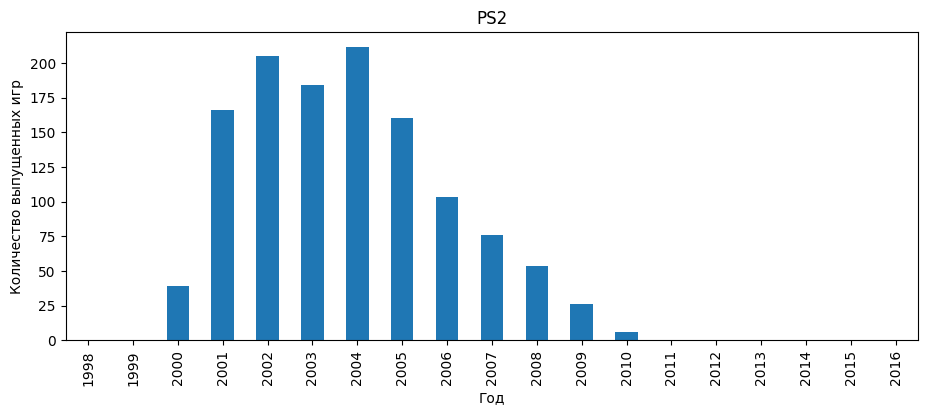

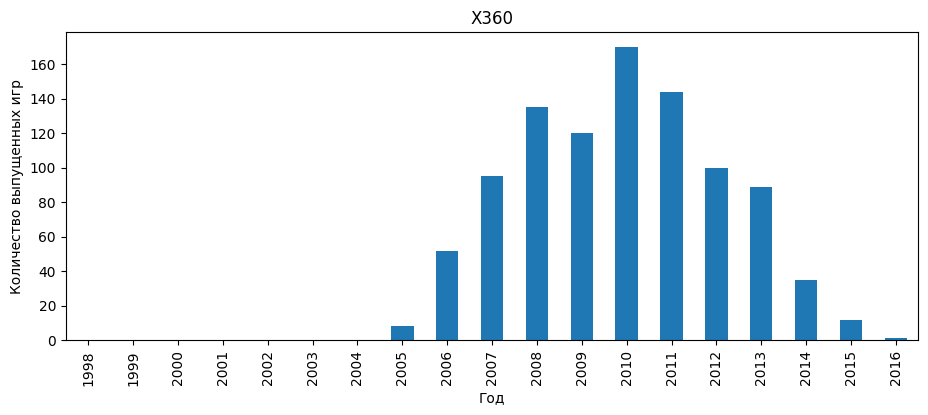

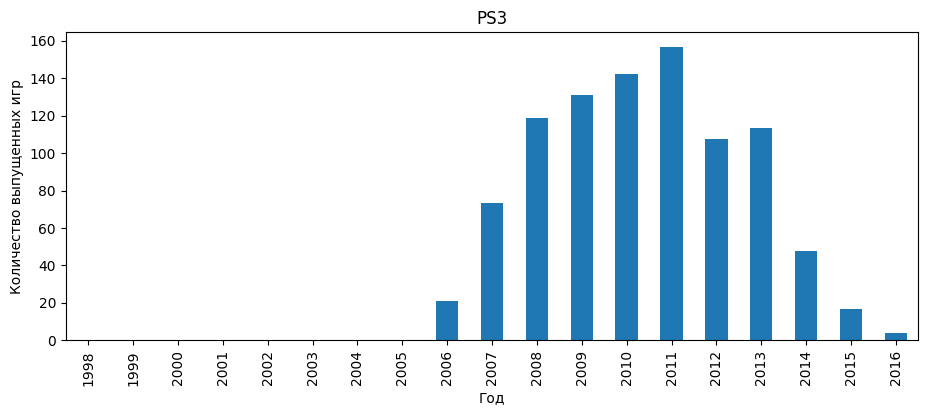

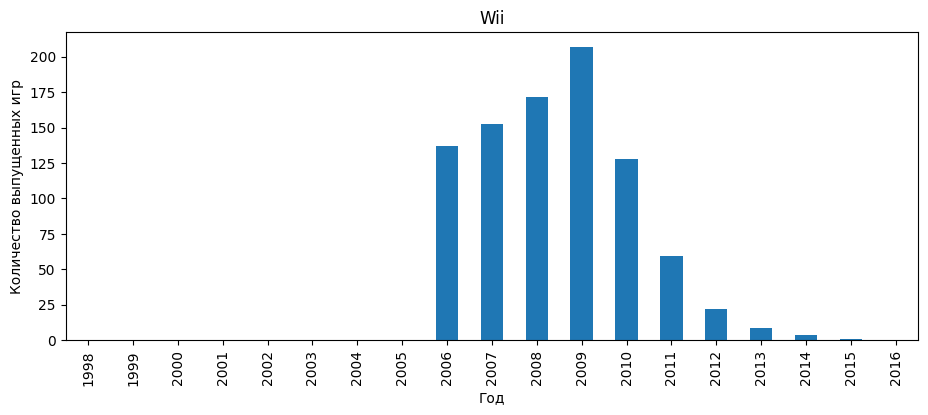

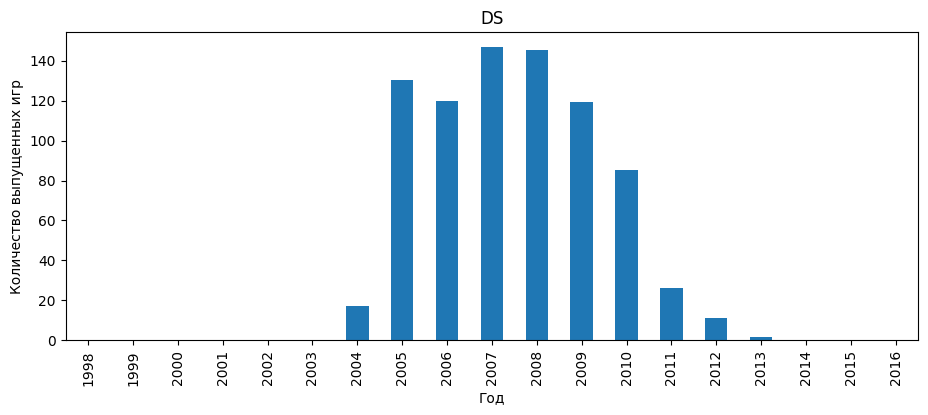

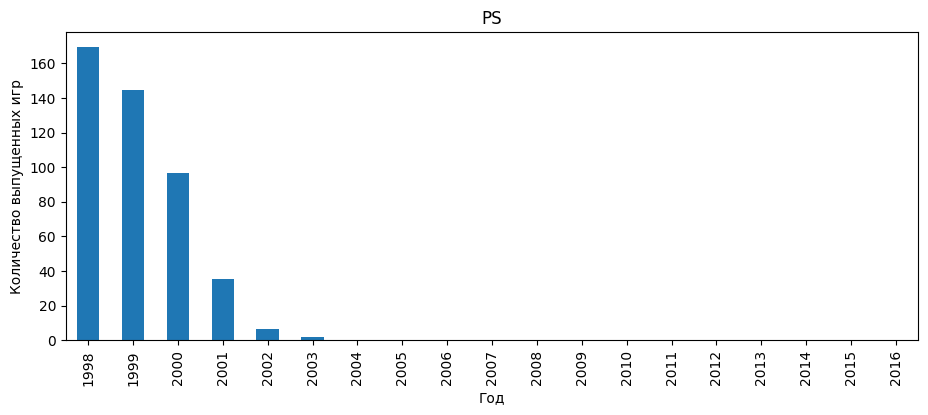

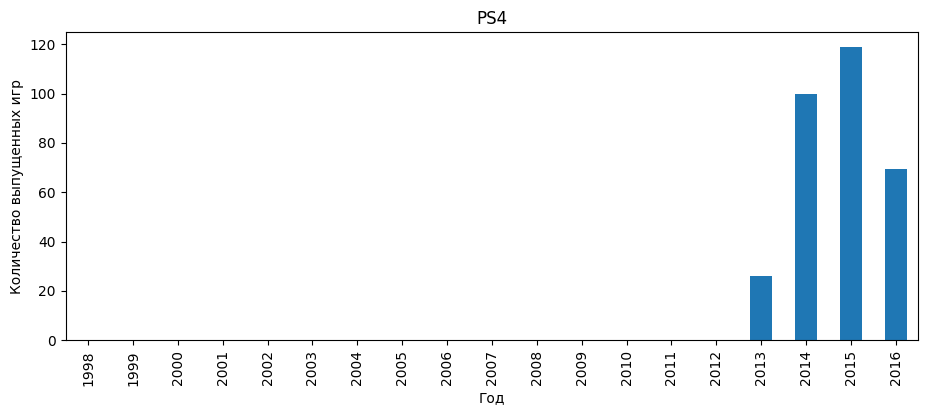

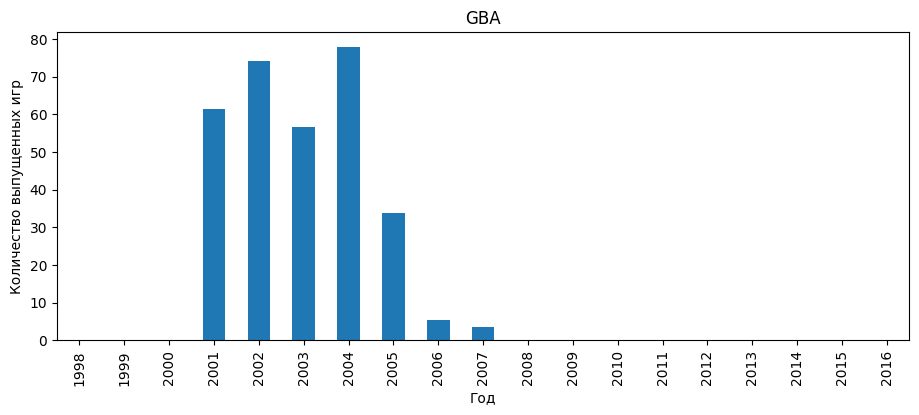

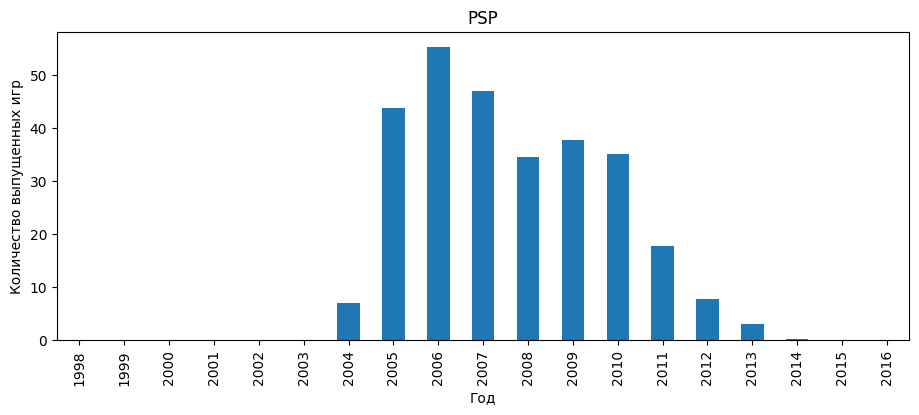

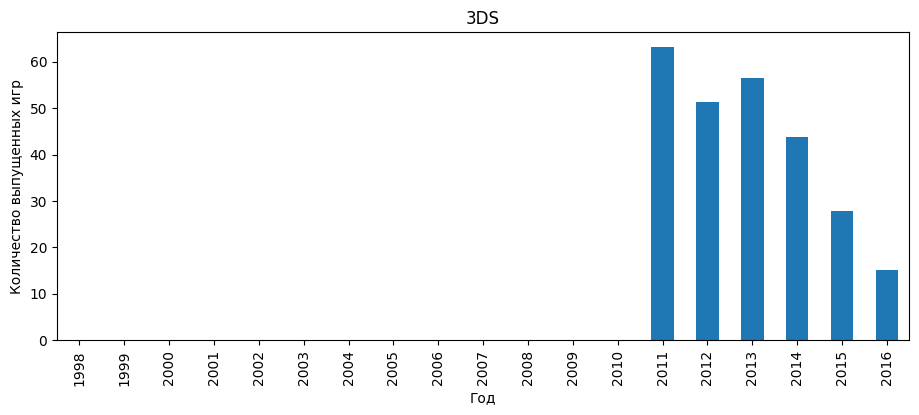

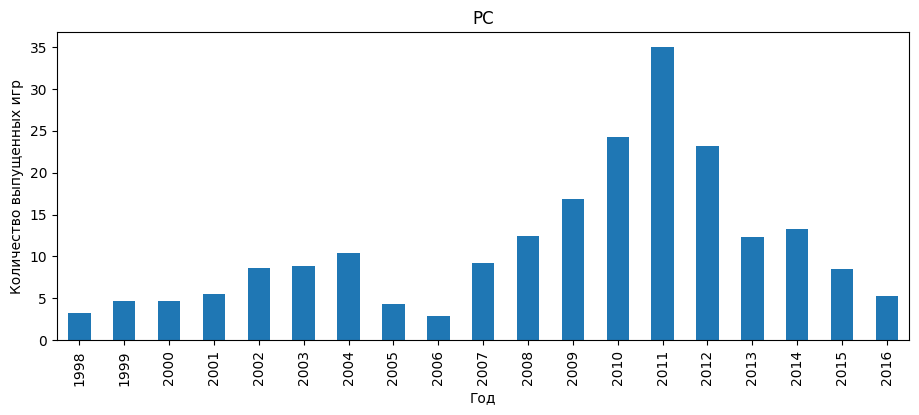

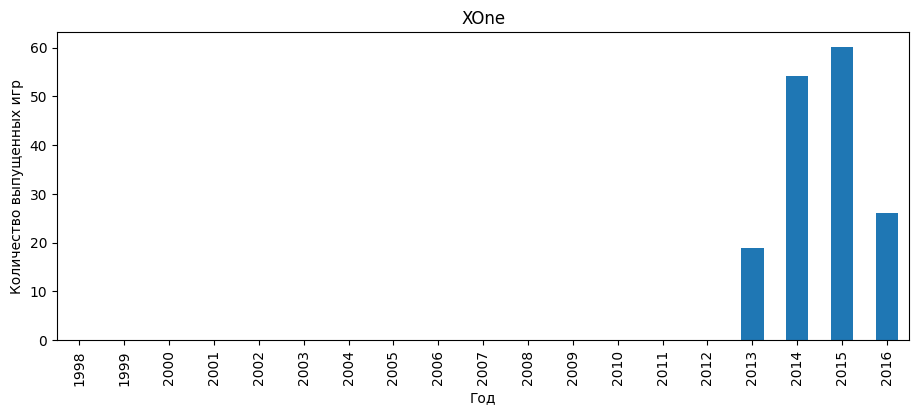

In [23]:
list_c = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS', 'PC', 'XOne']

for col_l in list_c:
    forsen_platforms[col_l].plot(kind='bar', figsize=(11,4))
    plt.xlabel('Год')
    plt.ylabel('Количество выпущенных игр')
    plt.title(col_l)
    plt.show()

Посмотрев на графики и посмотрев год, в котором начали выходить игры на платформу и в котором их прекратили выпускать, можно сделать вывод, что в среднем платформы "живут" 8 лет. Новые платформы в период с 1997 года по 2016 не выходили в 2002, 2003, 2008, 2009, 2010, 2014, 2015, 2016. Можно сделать вывод, что в рассматриваемом периоде до 2002 года, платформы выходили каждый год. После, в среднем, новые платформы появляются каждые 2,5-3 года. Игры на персональные компьютеры выходили и продолжают выходить каждый год. Данная платформа в настоящий момент далека от исчезновения. Если рассматривать выход новых поколений консолей, к примеру, playstation, то в среднем для выхода нового поколения требуется около 6 лет.

Определим **актуальный период** для проведения дальнейшего исследовательского анализа нашей темы. Для этого посмотрим на сводную таблицу общих продаж для каждой платформы с распределением по годам в период с 1997 по 2016 гг., а также самые популярные, неустаревшие и новейшие платформы. Многие игровые франшизы, которые существуют и по сей день, в своё  время, в основном, вышли на консоли playstation и xbox, а также на ПК. Обозначим начало нашего актуального периода - дата выхода консоли Playstation 3 (2006 год). В целом конец нулевых можно в какой-то степени считать золотым веком компьютерных игр. Конец периода обозначим как последний имеющийся год с данными - 2016.

In [24]:
forsen = forsen.query('year_of_release >= 2013')
display(forsen)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [25]:
forsen_platform_leaders = forsen.pivot_table(index='platform', values='total_sales', aggfunc='sum')
display(forsen_platform_leaders.sort_values('total_sales', ascending=False))

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


В интересующем нас периоде осталось 11 платформ.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по этим платформам. Опишем результат.

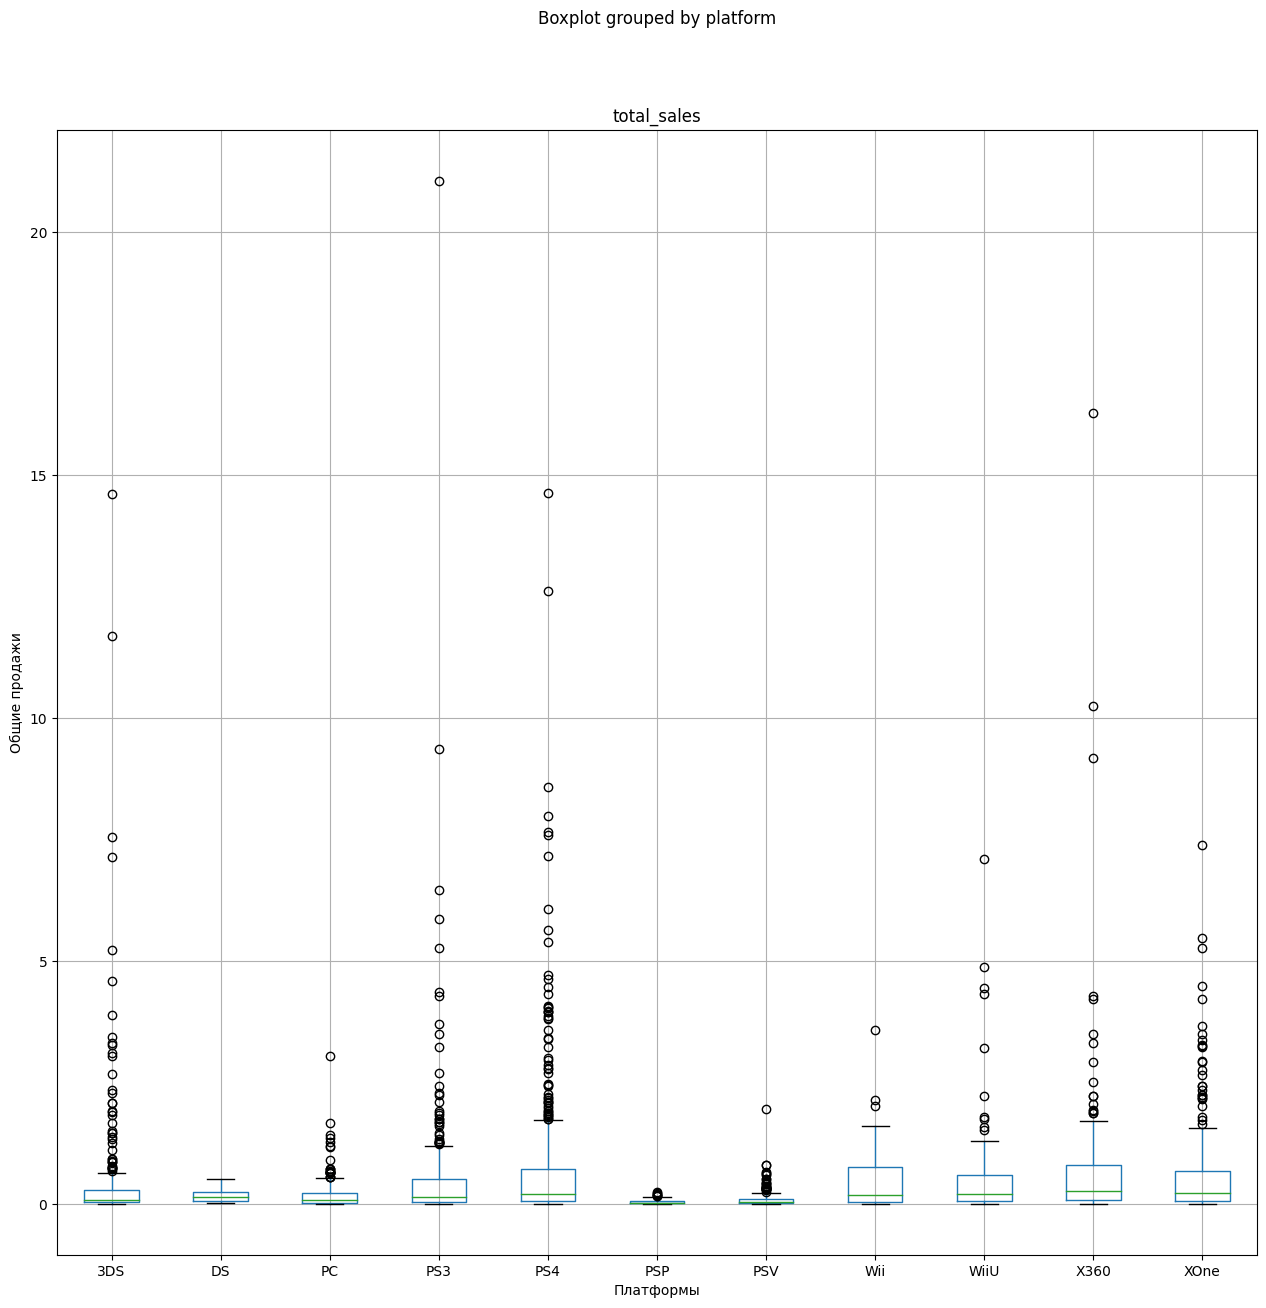

In [26]:
forsen.boxplot(column=['total_sales'], by='platform', figsize=(15,15))
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

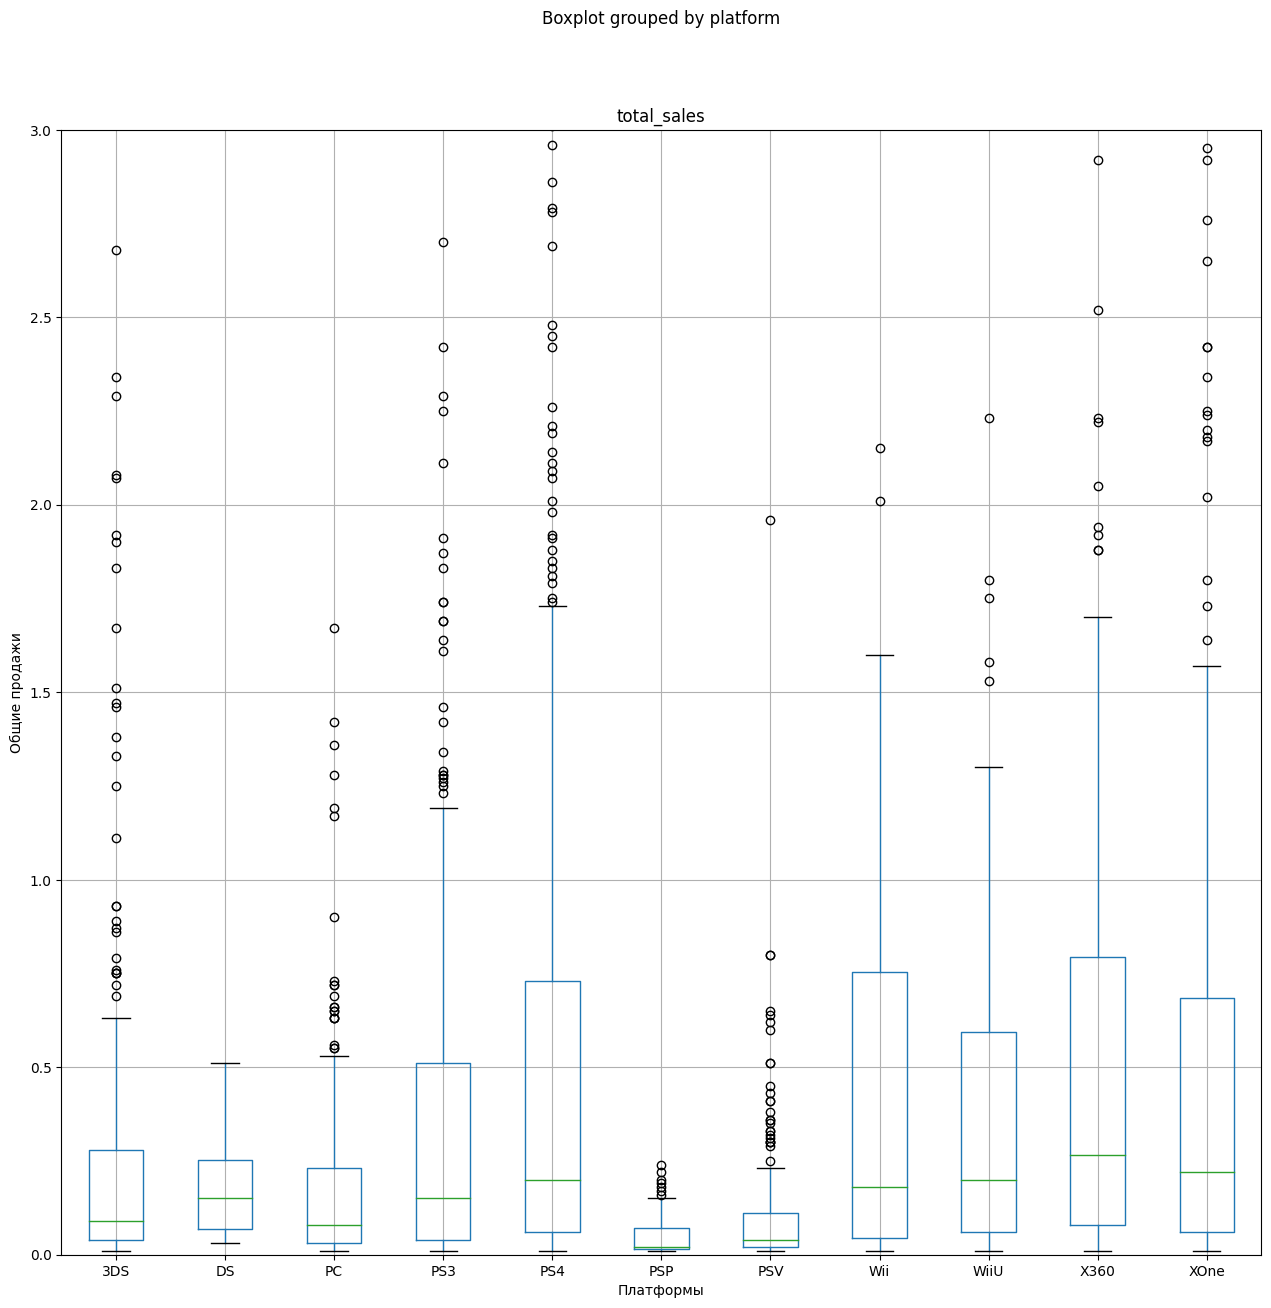

In [27]:
forsen.boxplot(column=['total_sales'], by='platform', figsize=(15,15))
plt.ylim(0, 3)
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

По диаграммам размаха выше мы видим, что самые низкие медианы продаж у PSP и PSV. Следом идут PC и 3DS, у второй гораздо больше успешно проданных игр. Платформы Wii и WiiU имеют примерно одинаковое распределение. Медианное PS3 меньше, чем у XBox 360, однако более успешных игр и игр в целом на неё вышло больше. Самые успешные продажи пришлись на PS4 и XOne, медианное у этих двух платформ прим. одинаковое. Наиболее успешная игра на PS4 (COD Black Ops III, 14.6 млн.). На втором месте по этому показателю XOne - 7.4 млн. В целом распределение наиболее успешно проданных игр находится на PS4, основная масса значений от ~1.8 млн. до 4 млн., похуже на XOne - от ~1.5 до 3.3 млн. 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграммы рассеяния для PS4 между отзывами и продажами. 

In [28]:
forsen.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.124551,-0.087983,-0.074142,-0.090225,0.064322,0.039318,-0.117878
na_sales,-0.124551,1.000000,0.769995,0.264513,0.817367,0.301130,-0.020010,0.922617
eu_sales,-0.087983,0.769995,1.000000,0.244616,0.934796,0.280785,-0.027040,0.928031
jp_sales,-0.074142,0.264513,0.244616,1.000000,0.195192,0.134143,0.194025,0.434394
other_sales,-0.090225,0.817367,0.934796,0.195192,1.000000,0.275289,-0.011500,0.921370
critic_score,0.064322,0.301130,0.280785,0.134143,0.275289,1.000000,0.502221,0.313700
user_score,0.039318,-0.020010,-0.027040,0.194025,-0.011500,0.502221,1.000000,-0.002608
total_sales,-0.117878,0.922617,0.928031,0.434394,0.921370,0.313700,-0.002608,1.000000


По матрице корреляций видно, что между общими продажами и пользовательскими оценками она практически отсутствует (-0.03%). Что касается оценки критиков, то ситуация немного иная: слабая, но корреляция присутствует, почти 32%.

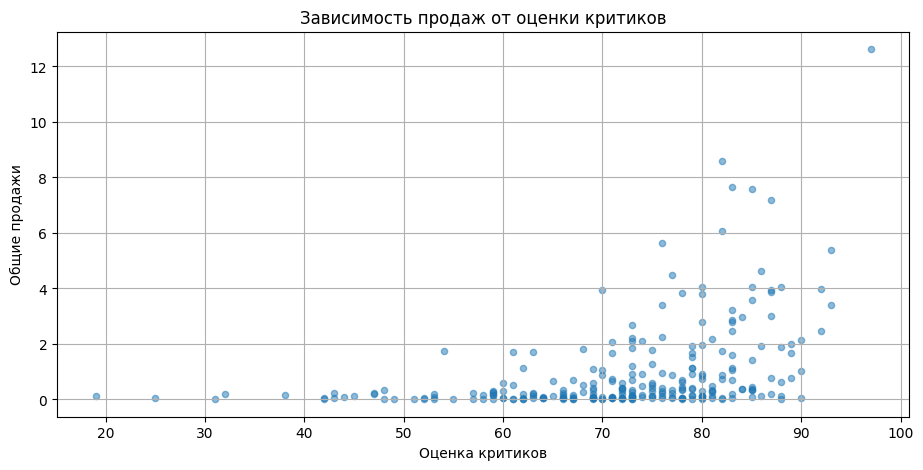

In [29]:
forsen_ps4_scatter = forsen.query('platform == "PS4"')
forsen_ps4_scatter.plot(kind='scatter', x='critic_score', y='total_sales', grid=True, alpha=0.5, figsize=(11,5))
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи')
plt.title('Зависимость продаж от оценки критиков')
plt.show()

In [30]:
forsen_ps4_scatter.query('total_sales > 12')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Видна некая корреляция между оценкой критиков и кол-м проданных копий на PS4. До 60 баллов лишь одна игра продалась почти в 2 млн. копий, между 60-70 баллов таких игр уже почти 4. Начиная с 70 баллов 1 игра почти добралась до отметки в 6 млн. проданных копий, заметно больше продалось тиражом 2-4 млн. На отрезке 80-90 4 шт. продались тиражом от 6 до 8 млн. и одной даже удалось почти достичь отметки в 9 млн. копий. Игра, получившая оценку в 97/100 продалась лучше всех - 12,62 млн. копий - GTA V.

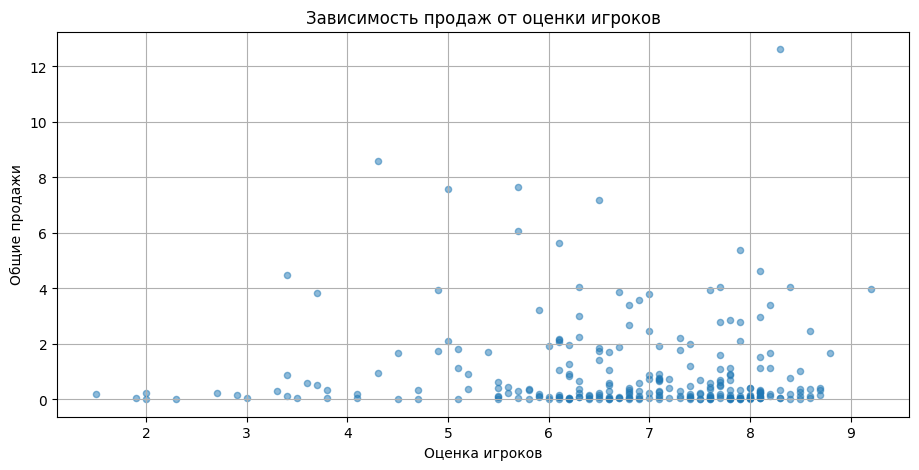

In [31]:
forsen_ps4_scatter.plot(kind='scatter', x='user_score', y='total_sales', grid=True, alpha=0.5, figsize=(11,5))
plt.xlabel('Оценка игроков')
plt.ylabel('Общие продажи')
plt.title('Зависимость продаж от оценки игроков')
plt.show()

Судя как по графику, так и по значению корреляции, продажи игр на PS4 не зависят от пользовательского рейтинга. Игры, получавшие оценку в диапазоне от 40 до 70 баллов, продавались успешнее, нежели более высокооцененные проекты. 

In [32]:
forsen_ps4_scatter[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']

critic_score    0.406568
user_score     -0.031957
total_sales     1.000000
Name: total_sales, dtype: float64

Выше мы посчитали значение корреляции между оценками игроков/критиков и кол-вом проданных копий игры. Информация на наших графиках подтвердилась.

Напишем цикл для построения диаграмм разброса зависимости продаж игры от её как пользовательских оценок, так и оценок от критиков для других платформ и позже сравним результаты.

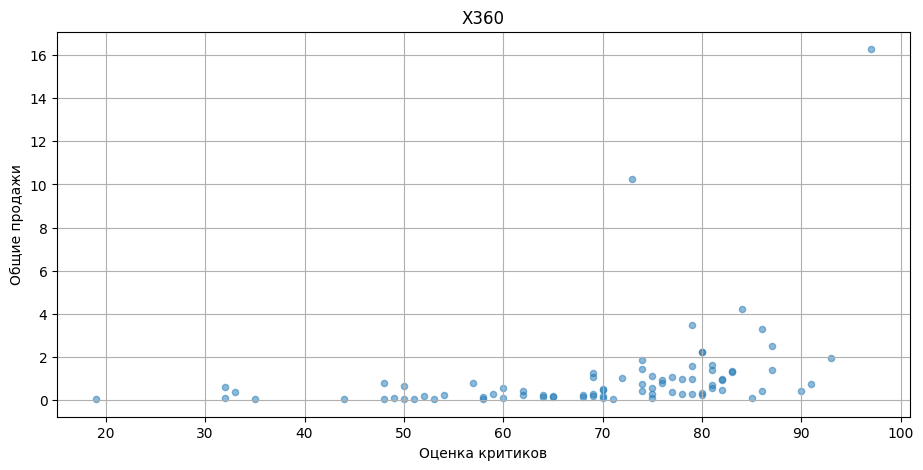

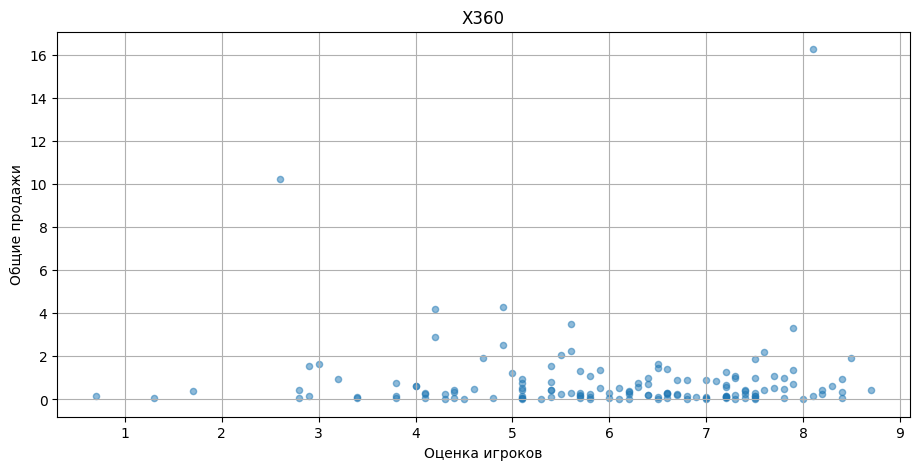

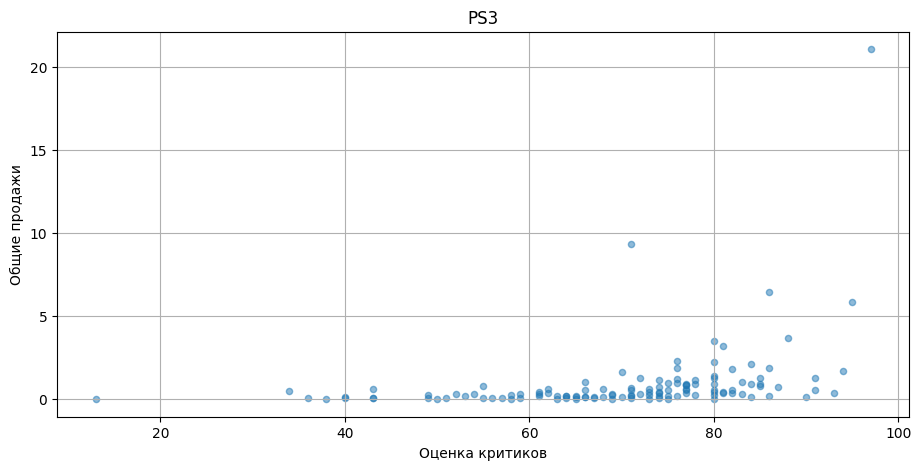

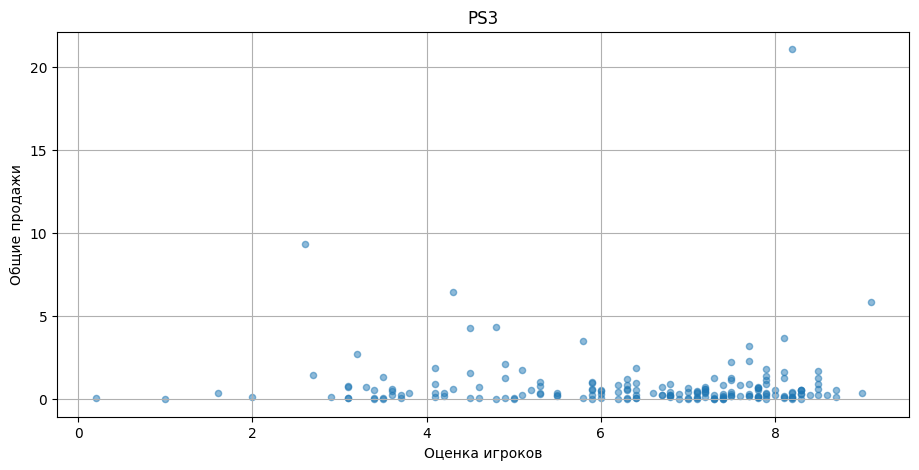

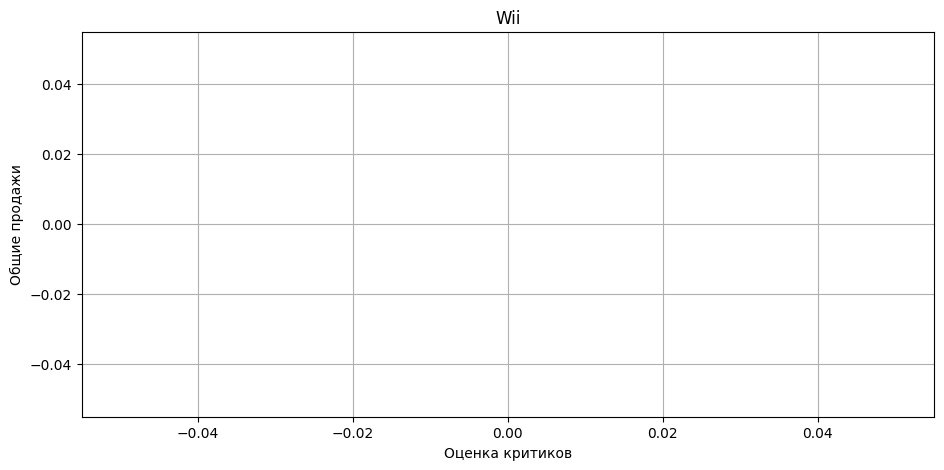

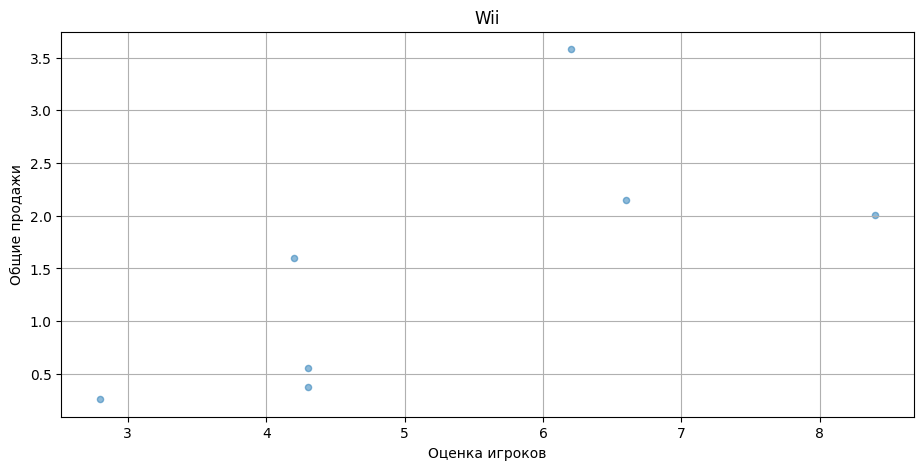

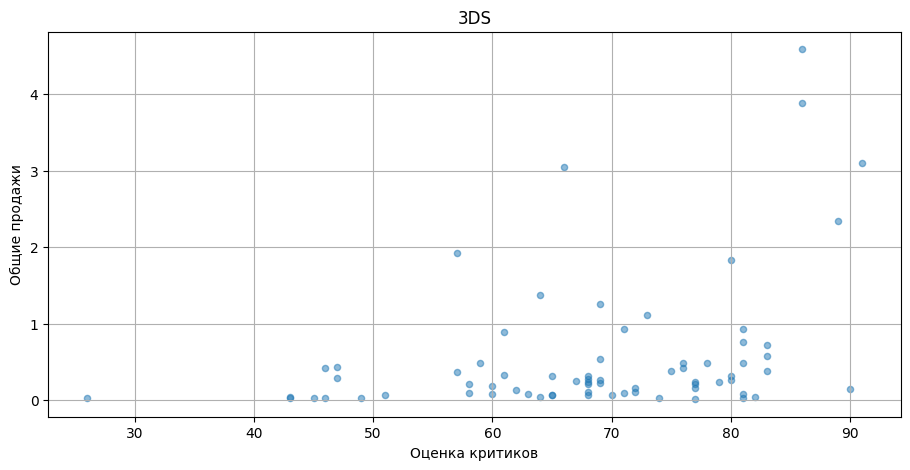

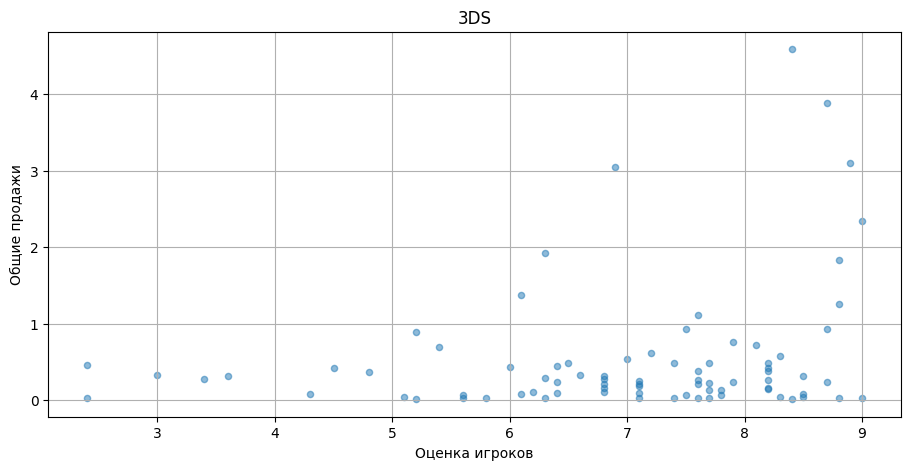

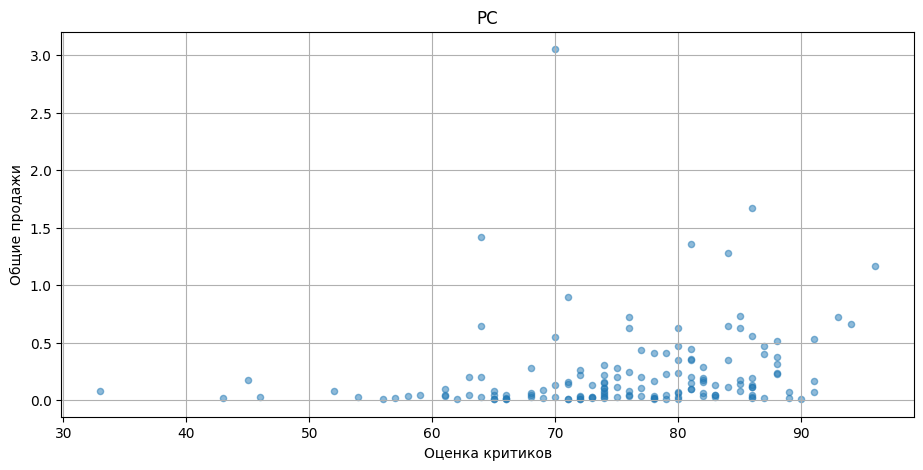

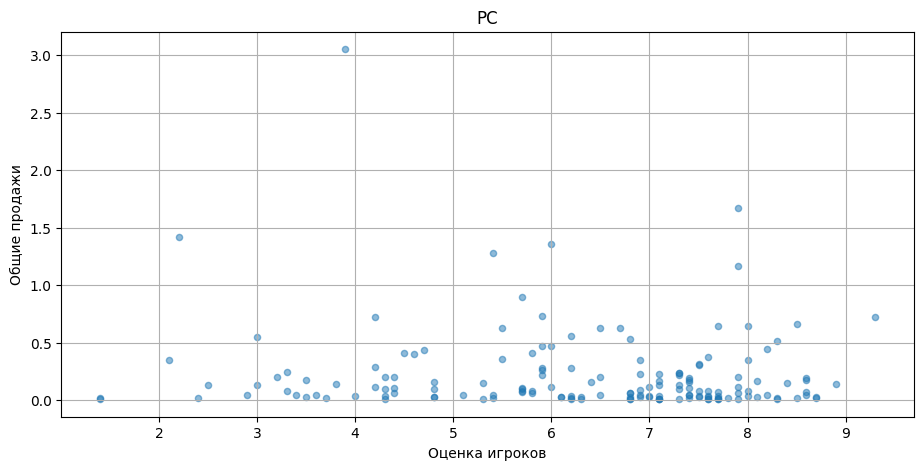

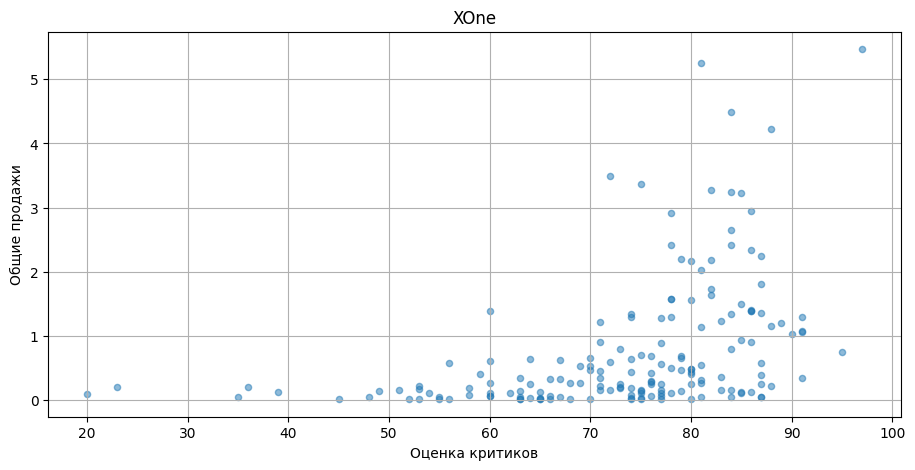

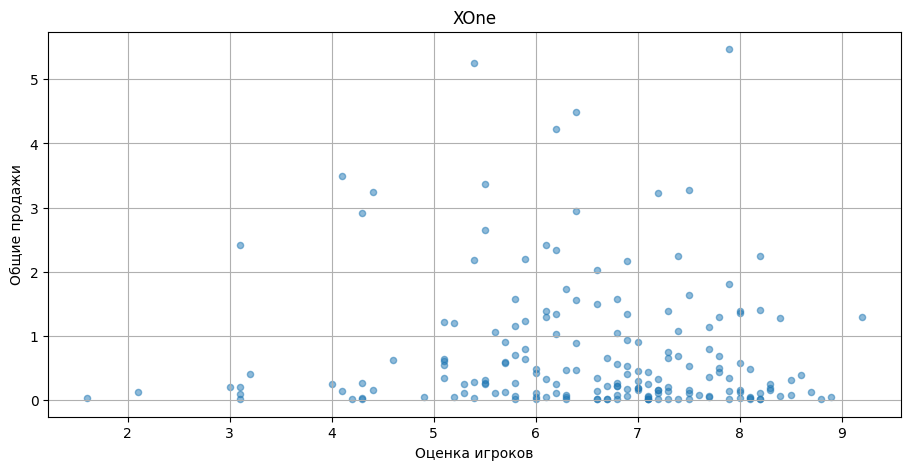

In [33]:
list_b = ['X360', 'PS3', 'Wii', '3DS', 'PC', 'XOne']



for col_l in list_b:
    forsen[forsen['platform'] == col_l].plot(kind='scatter', x='critic_score', y='total_sales', grid=True, alpha=0.5, figsize=(11,5))
    plt.xlabel('Оценка критиков')
    plt.ylabel('Общие продажи')
    plt.title(col_l)
    plt.show()
    
    forsen[forsen['platform'] == col_l].plot(kind='scatter', x='user_score', y='total_sales', grid=True, alpha=0.5, figsize=(11,5))
    plt.xlabel('Оценка игроков')
    plt.ylabel('Общие продажи')
    plt.title(col_l)
    plt.show()
    

In [34]:
forsen_360_corr = forsen.query('platform == "X360"')
forsen_360_corr[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']

critic_score    0.350345
user_score     -0.011742
total_sales     1.000000
Name: total_sales, dtype: float64

In [35]:
forsen_ps3_corr = forsen.query('platform == "PS3"')
forsen_ps3_corr[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']

critic_score    0.334285
user_score      0.002394
total_sales     1.000000
Name: total_sales, dtype: float64

In [36]:
forsen_wii_corr = forsen.query('platform == "Wii"')
forsen_wii_corr[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']

critic_score         NaN
user_score      0.682942
total_sales     1.000000
Name: total_sales, dtype: float64

In [37]:
forsen_3ds_corr = forsen.query('platform == "3DS"')
forsen_3ds_corr[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']

critic_score    0.357057
user_score      0.241504
total_sales     1.000000
Name: total_sales, dtype: float64

In [38]:
forsen_pc_corr = forsen.query('platform == "PC"')
forsen_pc_corr[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']

critic_score    0.196030
user_score     -0.093842
total_sales     1.000000
Name: total_sales, dtype: float64

In [39]:
forsen_xone_corr = forsen.query('platform == "XOne"')
forsen_xone_corr[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']

critic_score    0.416998
user_score     -0.068925
total_sales     1.000000
Name: total_sales, dtype: float64

По диаграмме рассеяния для XOne зависимость видна практически аналогично, как для PS4. Всего одна игра с оценкой критиков ниже 70 продалать в районе ~1.4 млн. копий. Много успешных игр с продажами от 2 до ~5,3 млн. ед. находятся в диапазоне 70-90. Самая успешная игра имеет 97 баллов и она разошлась тиражом 5,47 млн. - GTA V. Корреляция между продажами и оценкой критиков 41,7%. Корреляция между продажами и оценкой игроков отсутствует.  

Диаграмма рассеяния зависимости оценки критиков и общих продаж на ПК не так сильно отражает корреляцию между значениями. Только 1 игра на ПК, получившая оценку ниже 70 разошлась тиражом более миллиона копий. На отрезке с 70 до 80 баллов данную отметку удалось преодолеть уже большему числу игр. 3 игры с оценкой выше 90 баллов продались в кол-ве больше 3.8 млн. копий, самая успешная игра с рейтингом 86 разошлась тиражом в 8.01 млн. копий - The Sims 3. Значение корреляции между продажами и оценкой критиков для ПК - 20%. Существует оч. маленькая обратная корреляция между продажами и оценкой пользователей на пк - -9%.

Ситуация с Хbox 360 такова, что более-менее успешные игры имеют оценку критиков 70+, значение корреляции между оценкой и общими продажами 35%. Корреляция между продажами и оценкой пользователей отсутствует.  

Результаты PS3 аналогичны Xbox 360, значение корреляции между оценкой и общими продажами 33%. Корреляция между продажами и оценкой пользователей отсутствует.  

У игр, выпущенных на Wii отсутствуют оценки критиков, а по небольшому кол-ву данных оценок игроков, есть сильная корреляция между ними и общими продажами - 68%.  

В случае с платформой 3DS наблюдается корреляция между продажами и оценками критиков, так и оценками пользователей. 36% и 24% соответственно.  




Если соотнести выводы по PS4 с результатами по остальным платформам, то можно сказать следующее: \
На PS4 корреляция между общими продажами и оценками критиков - 41%, уступает только Xbox One (42%) и Wii (68%). Корреляция между общими продажами и оценками игроков отсутствует. Данная корреляция присутствует только у 3DS и равняется 24%. У ПК самая низкая корреляция общих продаж и оценок критиков - 19%. У 3DS, Xbox 360 и PS3 она прим. одинакова - 36%,35% и 33% соответственно.

Посмотрим на общее распределение игр по жанрам. Найдём самые прибыльные жанры. Выделим жанры с высокими и низкими продажами.

In [40]:
forsen_genres_analysis = forsen.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count'])
forsen_genres_analysis.columns = ['total_sales_sum', 'total_games_count']
display(forsen_genres_analysis)

,total_sales_sum,total_games_count
genre,,
Action,321.87,766
Adventure,23.64,245
Fighting,35.31,80
Misc,62.82,155
Platform,42.63,74
Puzzle,3.17,17
Racing,39.89,85
Role-Playing,145.89,292
Shooter,232.98,187


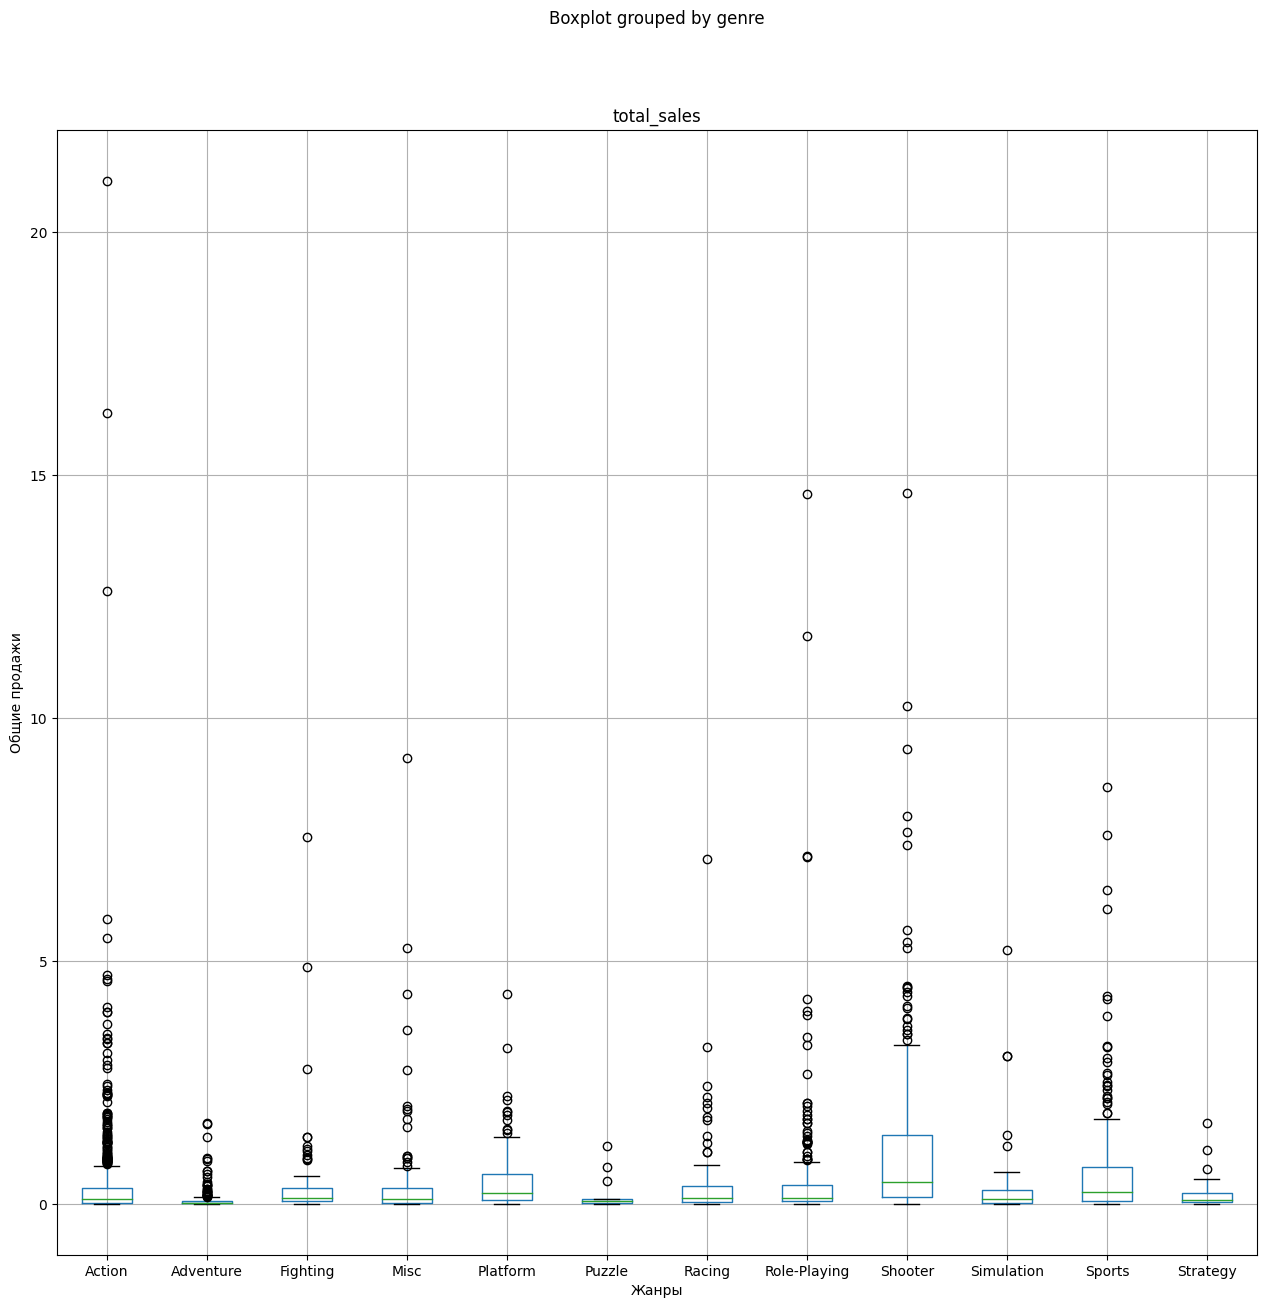

In [41]:
forsen.boxplot(column=['total_sales'], by='genre', figsize=(15,15))

plt.xlabel('Жанры')
plt.ylabel('Общие продажи')
plt.show()

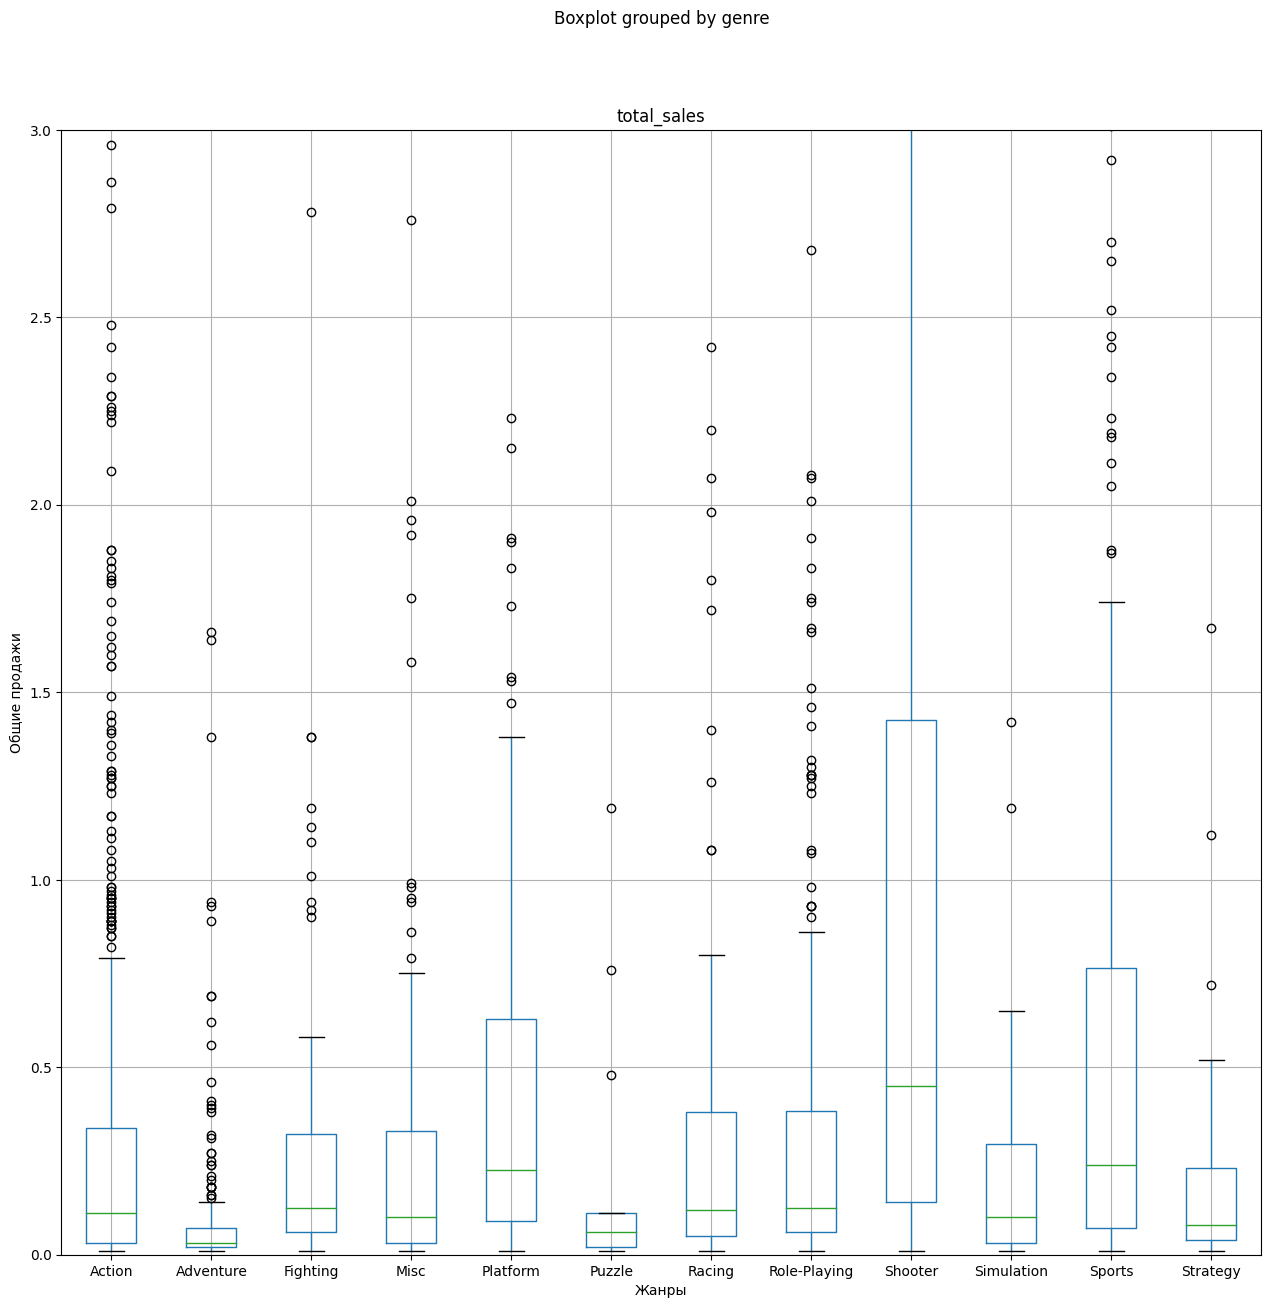

In [42]:
forsen.boxplot(column=['total_sales'], by='genre', figsize=(15,15))
plt.ylim(0, 3)
plt.xlabel('Жанры')
plt.ylabel('Общие продажи')
plt.show()

In [43]:
print('Общее кол-во продаж в млн.:', forsen_genres_analysis['total_sales_sum'].sum().round())
print()
print()
print('Общее кол-во выпущенных игр различных жанров:', forsen_genres_analysis['total_games_count'].sum())

Общее кол-во продаж в млн.: 1091.0


Общее кол-во выпущенных игр различных жанров: 2233


Общее кол-во жанров: 12  
Посмотрим на прибыльность жанров с помощью диаграммы размаха и сравних медианные продажи.  

Самым прибыльным жанром является шутер (shooter), 233 млн. (21.4%) проданных копий 187 различных игр (8.4% от общего числа). Имеет самое высокое медианное значение, третий квартиль выше, чем у всех остальных на графике, наибольшее кол-во успешно проданных игр, хотя самые успешные все же игра не данного жанра. На втором месте экшн (action) - 322 млн. (29.5%) копий, 766 выпущенных игр (34% от общего числа). Медианное значение данного жанра далеко не на самом высоком месте, однако общее кол-во достаточно успешных игр принадлежит именно этому жанру, более того самая продаваемая игра также является жанром экшн. На третьем месте спортивные симуляторы - 151 млн. продаж (14%) и 214 выпущенных игр (9.6%). Медианное значение на первом месте после шутеров. Распределение успешных игр по продажам на третьем месте после шутеров и экшна. Три данных жанра в сумме занимают почти 2/3 общей доли рынка и более половины из общего числа выпущенных игр в рассматриваемом периоде. Самый худший результат у адвенчур - 24 млн. продаж и 245 различных игр (2.2% и 11% соответственно). Самое низкое медианное значение и наибольшее кол-во самых провальных игр по продажам.

**Составим портрет пользователя из каждого представленного региона**

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5)
* Самые популярные жанры (топ-5)
* Влияет ли рейтинг ESRB на продажи в отдельном регионе

Поясним значения аббревиатур рейтинга ESRB:
* E - подходит всем возрастным категориям
* EC - дети с трёх лет
* E10+ - дети с 10 лет
* T - подростки с 13 лет
* RP - неопределен, скорее всего 17+
* M - 17+

Рейтинг присущ только играм, выпущенным на территории США, Канады и Мексики.

In [44]:
display(forsen)
forsen['rating'].value_counts()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

In [45]:
forsen_na_region_sales_analysis = forsen.pivot_table(index='platform', values='na_sales', aggfunc='sum')
forsen_na_region_genre_analysis = forsen.pivot_table(index='genre', values='na_sales', aggfunc='sum')
forsen_na_region_rating_analysis = forsen.pivot_table(index='rating', values='na_sales', aggfunc='sum')
forsen_na_region_sales_analysis = forsen_na_region_sales_analysis.sort_values('na_sales', ascending=False)
display(forsen_na_region_sales_analysis)
display(forsen_na_region_genre_analysis.sort_values('na_sales', ascending=False))
display(forsen_na_region_rating_analysis.sort_values('na_sales', ascending=False))

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


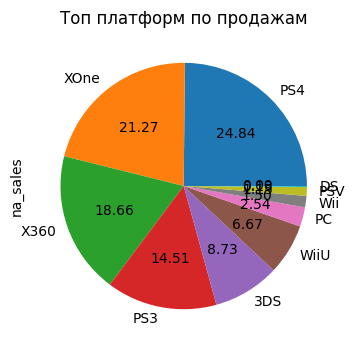

In [46]:
forsen_na_region_sales_analysis.plot(kind='pie', figsize=(11,4), subplots=True, autopct='%.2f', legend=False)
plt.title('Топ платформ по продажам')
plt.show()

In [47]:
forsen_na_region_sales_analysis_other = forsen_na_region_sales_analysis[5:]
forsen_na_region_sales_analysis_other = forsen_na_region_sales_analysis.head().append(
    {'platform' : 'other',
     'na_sales': forsen_na_region_sales_analysis['na_sales'].sum() - forsen_na_region_sales_analysis['na_sales'][:5].
     sum()}, ignore_index=True)
display(forsen_na_region_sales_analysis_other)


,na_sales,platform
0,108.74,NaN
1,93.12,NaN
2,81.66,NaN
3,63.50,NaN
4,38.20,NaN
5,52.49,other


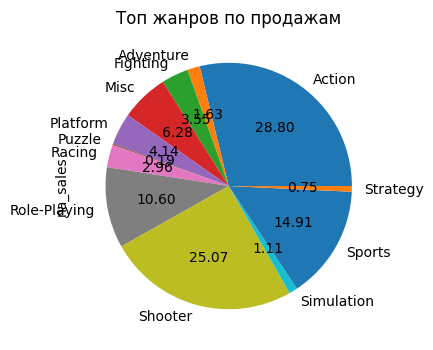

In [48]:
forsen_na_region_genre_analysis.plot(kind='pie', figsize=(11,4), subplots=True, autopct='%.2f', legend=False)
plt.title('Топ жанров по продажам')
plt.show()

In [49]:
forsen_na_region_sales_analysis['ratio'] = (
    forsen_na_region_sales_analysis['na_sales'] / forsen_na_region_sales_analysis['na_sales'].sum())
print(forsen_na_region_sales_analysis)


          na_sales     ratio
platform                    
PS4         108.74  0.248429
XOne         93.12  0.212744
X360         81.66  0.186562
PS3          63.50  0.145073
3DS          38.20  0.087272
WiiU         29.21  0.066734
PC           11.11  0.025382
Wii           6.56  0.014987
PSV           5.04  0.011514
DS            0.57  0.001302
PSP           0.00  0.000000


#### Платформы в Северной Америке по популярности:
* 1 место - PS4, доля продаж 24.8% (108.7 млн.)
* 2 место - XOne, доля продаж 21.3% (93.1 млн.)
* 3 место - X360, доля продаж 18.7% (81.7 млн.)
* 4 место - PS3, доля продаж 14.5% (63.5 млн.)
* 5 место - 3DS, доля продаж 8.7% (38.2 млн.)

In [50]:
forsen_na_region_genre_analysis['ratio'] = (
    forsen_na_region_genre_analysis['na_sales'] / forsen_na_region_genre_analysis['na_sales'].sum())
print(forsen_na_region_genre_analysis.sort_values('na_sales', ascending=False))

              na_sales     ratio
genre                           
Action          126.05  0.287976
Shooter         109.74  0.250714
Sports           65.27  0.149117
Role-Playing     46.40  0.106006
Misc             27.49  0.062804
Platform         18.14  0.041443
Fighting         15.55  0.035526
Racing           12.96  0.029609
Adventure         7.14  0.016312
Simulation        4.86  0.011103
Strategy          3.28  0.007494
Puzzle            0.83  0.001896


#### Жанры в Северной Америке по популярности:
* 1 место - экшн, доля продаж 28.8% (126.05 млн.)
* 2 место - шутер, доля продаж 25.1% (109.7 млн.)
* 3 место - спортивные симуляторы, доля продаж 14.9% (65.3 млн.)
* 4 место - РПГ, доля продаж 10.6% (46.4 млн.)
* 5 место - misc, доля продаж 6.3% (27.5 млн.)

In [51]:
forsen_na_region_rating_analysis['ratio'] = (
    forsen_na_region_rating_analysis['na_sales'] / forsen_na_region_rating_analysis['na_sales'].sum())
print(forsen_na_region_rating_analysis.sort_values('na_sales', ascending=False))

        na_sales     ratio
rating                    
M         165.21  0.474346
E          79.05  0.226966
E10+       54.24  0.155732
T          49.79  0.142956


Больше всего продано игр с рейтингом М (Mature, 17+), 165.2 млн., доля 47.4%. На втором месте игры с возрастным рейтингом Е (для всех возрастов)- 79.05 млн., доля 22.7%; третье место - Е10+ (10+ лет), 54.2 млн., доля 15.6%. Игр с рейтингом Т (13+) продано 49.8 млн., доля 14.3%. 

In [52]:
forsen_eu_region_sales_analysis = forsen.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
forsen_eu_region_genre_analysis = forsen.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
forsen_eu_region_rating_analysis = forsen.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
display(forsen_eu_region_sales_analysis.sort_values('eu_sales', ascending=False))
display(forsen_eu_region_genre_analysis.sort_values('eu_sales', ascending=False))
display(forsen_eu_region_rating_analysis.sort_values('eu_sales', ascending=False))

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


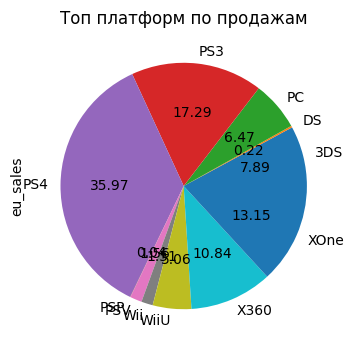

In [53]:
forsen_eu_region_sales_analysis.plot(kind='pie', figsize=(11,4), subplots=True, autopct='%.2f', legend=False)
plt.title('Топ платформ по продажам')
plt.show()

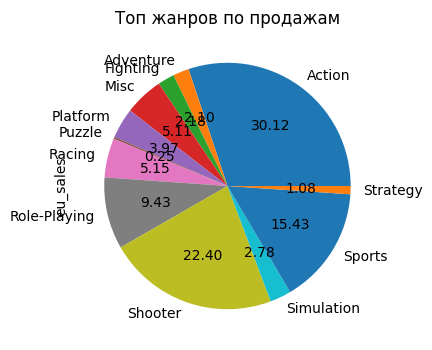

In [54]:
forsen_eu_region_genre_analysis.plot(kind='pie', figsize=(11,4), subplots=True, autopct='%.2f', legend=False)
plt.title('Топ жанров по продажам')
plt.show()

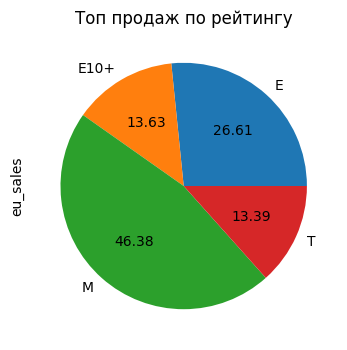

In [55]:
forsen_eu_region_rating_analysis.plot(kind='pie', figsize=(11,4), subplots=True, autopct='%.2f', legend=False)
plt.title('Топ продаж по рейтингу')
plt.show()

In [56]:
forsen_eu_region_sales_analysis['ratio'] = (
    forsen_eu_region_sales_analysis['eu_sales'] / forsen_eu_region_sales_analysis['eu_sales'].sum())
print(forsen_eu_region_sales_analysis.sort_values('eu_sales', ascending=False))

          eu_sales     ratio
platform                    
PS4         141.09  0.359712
PS3          67.81  0.172883
XOne         51.59  0.131530
X360         42.52  0.108406
3DS          30.96  0.078933
PC           25.36  0.064656
WiiU         19.85  0.050608
PSV           6.10  0.015552
Wii           5.93  0.015119
DS            0.85  0.002167
PSP           0.17  0.000433


#### Платформы в Европе по популярности:
* 1 место - PS4, доля продаж 36% (141.09 млн.)
* 2 место - PS3, доля продаж 17.3% (67.81 млн.)
* 3 место - XOne, доля продаж 13.2% (51.59 млн.)
* 4 место - X360, доля продаж 10.8% (42.52 млн.)
* 5 место - 3DS, доля продаж 7.9% (30.96 млн.)

In [57]:
forsen_eu_region_genre_analysis['ratio'] = (
    forsen_eu_region_genre_analysis['eu_sales'] / forsen_eu_region_genre_analysis['eu_sales'].sum())
print(forsen_eu_region_genre_analysis.sort_values('eu_sales', ascending=False))

              eu_sales     ratio
genre                           
Action          118.13  0.301175
Shooter          87.86  0.224001
Sports           60.52  0.154297
Role-Playing     36.97  0.094256
Racing           20.19  0.051475
Misc             20.04  0.051092
Platform         15.58  0.039722
Simulation       10.92  0.027841
Fighting          8.55  0.021798
Adventure         8.25  0.021034
Strategy          4.22  0.010759
Puzzle            1.00  0.002550


#### Жанры в Европе по популярности:
* 1 место - экшн, доля продаж 30.1% (118.13 млн.)
* 2 место - шутер, доля продаж 22.4% (87.86 млн.)
* 3 место - спортивные симуляторы, доля продаж 15.4% (60.52 млн.)
* 4 место - РПГ, доля продаж 9.4% (36.97 млн.)
* 5 место - Гонки, доля продаж 5.1% (20.19 млн.)

In [58]:
forsen_eu_region_rating_analysis['ratio'] = (
    forsen_eu_region_rating_analysis['eu_sales'] / forsen_eu_region_rating_analysis['eu_sales'].sum())
print(forsen_eu_region_rating_analysis.sort_values('eu_sales', ascending=False))

        eu_sales     ratio
rating                    
M         145.32  0.463807
E          83.36  0.266054
E10+       42.69  0.136250
T          41.95  0.133889


Больше всего продано игр с рейтингом М (Mature, 17+), 145.32 млн., доля 49.4%. На втором месте игры с возрастным рейтингом Е (для всех возрастов) - 83.36 млн., доля 26.6%; третье место - Е10+ (10+ лет), 42.69 млн., доля 13.6%. Игр с рейтингом Т (13+)продано 41.95 млн., доля 13.4%. 

In [59]:
forsen_jp_region_sales_analysis = forsen.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
forsen_jp_region_genre_analysis = forsen.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
forsen_jp_region_rating_analysis = forsen.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
display(forsen_jp_region_sales_analysis.sort_values('jp_sales', ascending=False))
display(forsen_jp_region_genre_analysis.sort_values('jp_sales', ascending=False))
display(forsen_jp_region_rating_analysis.sort_values('jp_sales', ascending=False))

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


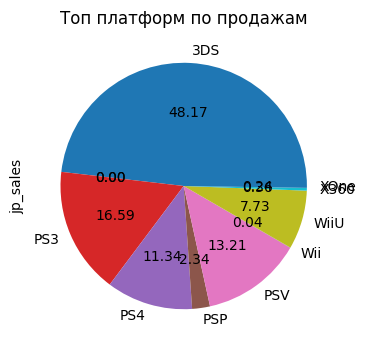

In [60]:
forsen_jp_region_sales_analysis.plot(kind='pie', figsize=(11,4), subplots=True, autopct='%.2f', legend=False)
plt.title('Топ платформ по продажам')
plt.show()

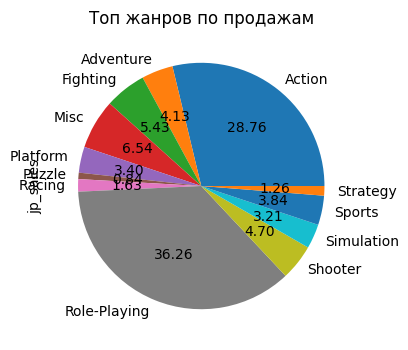

In [61]:
forsen_jp_region_genre_analysis.plot(kind='pie', figsize=(11,4), subplots=True, autopct='%.2f', legend=False)
plt.title('Топ жанров по продажам')
plt.show()

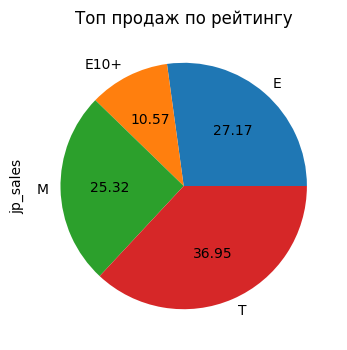

In [62]:
forsen_jp_region_rating_analysis.plot(kind='pie', figsize=(11,4), subplots=True, autopct='%.2f', legend=False)
plt.title('Топ продаж по рейтингу')
plt.show()

In [63]:
forsen_jp_region_sales_analysis['ratio'] = (
    forsen_jp_region_sales_analysis['jp_sales'] / forsen_jp_region_sales_analysis['jp_sales'].sum())
print(forsen_jp_region_sales_analysis.sort_values('jp_sales', ascending=False))

          jp_sales     ratio
platform                    
3DS          67.81  0.481674
PS3          23.35  0.165862
PSV          18.59  0.132050
PS4          15.96  0.113368
WiiU         10.88  0.077284
PSP           3.29  0.023370
X360          0.51  0.003623
XOne          0.34  0.002415
Wii           0.05  0.000355
DS            0.00  0.000000
PC            0.00  0.000000


#### Платформы в Японии по популярности:
* 1 место - 3DS, доля продаж 48.2% (67.81 млн.)
* 2 место - PS3, доля продаж 16.6% (23.35 млн.)
* 3 место - PSV, доля продаж 13.2% (18.59 млн.)
* 4 место - PS4, доля продаж 11.3% (15.96 млн.)
* 5 место - WiiU, доля продаж 7.7% (10.88 млн.)

In [64]:
forsen_jp_region_genre_analysis['ratio'] = (
    forsen_jp_region_genre_analysis['jp_sales'] / forsen_jp_region_genre_analysis['jp_sales'].sum())
print(forsen_jp_region_genre_analysis.sort_values('jp_sales', ascending=False))

              jp_sales     ratio
genre                           
Role-Playing     51.04  0.362551
Action           40.49  0.287612
Misc              9.20  0.065350
Fighting          7.65  0.054340
Shooter           6.61  0.046953
Adventure         5.82  0.041341
Sports            5.41  0.038429
Platform          4.79  0.034025
Simulation        4.52  0.032107
Racing            2.30  0.016338
Strategy          1.77  0.012573
Puzzle            1.18  0.008382


#### Жанры в Японии по популярности:
* 1 место - РПГ, доля продаж 36.3% (51.04 млн.)
* 2 место - экшн, доля продаж 28.8% (40.49 млн.)
* 3 место - misc, доля продаж 6.5% (9.20 млн.)
* 4 место - файтинги, доля продаж 5.4% (7.65 млн.)
* 5 место - шутер, доля продаж 4.7% (6.61 млн.)

In [65]:
forsen_jp_region_rating_analysis['ratio'] = (
    forsen_jp_region_rating_analysis['jp_sales'] / forsen_jp_region_rating_analysis['jp_sales'].sum())
print(forsen_jp_region_rating_analysis.sort_values('jp_sales', ascending=False))

        jp_sales     ratio
rating                    
T          20.59  0.369460
E          15.14  0.271667
M          14.11  0.253185
E10+        5.89  0.105688


Больше всего продано игр с рейтингом Т (13+), 20.6 млн., доля 36.9%. На втором месте игры с возрастным рейтингом Е (для всех возрастов) - 15.1 млн., доля 27.2%; третье место - рейтинг М (Mature, 17+), 14.1 млн., доля 25.3%. Игр с рейтингом Е10+ (10+ лет) продано 5.9 млн., доля 10.6%. 

**Распределение продаж по платформам в трёх регионах**  
В Северной Америке в Топ-5 платформ по убыванию - PS4, XOne, X360, PS3 и 3DS;
В Европе Топ-5 платформ по убыванию - PS4, PS3, XOne, X360, 3DS;
В Японии Топ-5 платформ по убыванию - 3DS, PS3, PSV, PS4, WiiU;

В NA и EU топ-5 состоит из одинаковых платформ, существуют некоторые различия в их долях и иерархии на рынке. В Японии свой собственный топ платформ.

**Распределение продаж по жанрам в трёх регионах**  
В Северной Америке в Топ-5 жанров по убыванию - экшн, шутер, спортивные симуляторы, РПГ, misc;
В Европе Топ-5 жанров по убыванию - экшн, шутер, спортивные симуляторы, РПГ, гонки;
В Японии Топ-5 жанров по убыванию - РПГ, экшн, misc, файтинги, шутеры;

В NA и EU топ-5 состоит и 4-х одинаковых жанров, различие лишь в том, что в NA misc замыкает топ, а в EU это гонки. В остальном топ-5 одинаковый для обоих регионов. В Японии опять же собственный топ-5 жанров игр - на первом месте РПГ, потом экшн, потом misc, следом файтинги и на последнем месте у нас шутеры.

**Влияние рейтинга ESRB на продажи в трёх регионах**  
В Европе и Северной Америке каждая категория рейтинга занимает одинаковое место в доле продаж. В Японии своё распределение, значительно отличающееся от двух других регионов.

### Проверка гипотез

In [66]:
display(forsen)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [67]:
forsen.info()
pc_score = forsen.query('platform == "PC"')
print(pc_score['user_score'].mean())
xb_score = forsen.query('platform == "XOne"')
print(xb_score['user_score'].mean())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB
6.269677419354839
6.521428571428572


Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
H_0: Пользовательский рейтинг (user_score) платформы "Xbox One" = Пользовательский рейтинг (user_score) платформы "PC"  
H_a: Пользовательский рейтинг (user_score) платформы "Xbox One" != Пользовательский рейтинг (user_score) платформы "PC"  
alpha = 0.05

In [68]:
from scipy import stats as st

pc = forsen[(forsen['platform'] == 'PC') & (forsen['user_score'].notna())]['user_score']
xbox = forsen[(forsen['platform'] == 'XOne') & (forsen['user_score'].notna())]['user_score']

alpha = .05

results = st.ttest_ind(xbox, pc, equal_var=False)

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


По результатам т-теста нулевая гипотеза была отвергнута, средние пользовательские рейтинги платформ XOne и PC различаются.

Проверим вторую гипотезу:  
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
H_0: Средние пользовательские рейтинги жанра Action (user_score)  = Средние пользовательские рейтинги жанра Sports (user_score)  
H_a: Средние пользовательские рейтинги жанра Action (user_score)  != Средние пользовательские рейтинги жанра Sports (user_score)   
alpha = 0.05

In [69]:
action = forsen[(forsen['genre'] == 'Action') & (forsen['user_score'].notna())]['user_score']
sports = forsen[(forsen['genre'] == 'Sports') & (forsen['user_score'].notna())]['user_score']

alpha = .05

results = st.ttest_ind(action, sports, equal_var=False)

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704318e-20
Отвергаем нулевую гипотезу


За нулевую гипотезу обычно берется утверждение, между которыми можно поставить знак равенства. Поэтому наша нулевая гипотеза это факт того, что средние пользовательские оценки жанра экшн и спортивных симуляторов равны. По результатам т-теста мы с уверенностью отвергаем нулевую гипотезу.

В данном случае мы применили t-критерий при тестировании гипотез, потому что для этого как раз есть специальный метод о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Он также позволяет учесть параметр, задающий, считать ли равными дисперсии выборок. Мы сравниваем средние пользовательские рейтинги из разных сегментов: разные платформы и разные жанры. В таком случае как раз подойдет данный метод.

### Общий вывод

**Общий вывод исследования**  
Проведя исследование, мы выяснили, что:  
* 16 715 игр 12 различных жанров было выпущено на 31 различной платформе за 36 лет с 1980 по неполный 2016 г. в трёх различных регионах - Европе, Северной Америке, Японии;
* До 1997-го года всего было выпущено менее 2-х тысяч игр 
* С 2013 года набирали популярность следующие консоли и игры для них - PS5, Xbox One, в меньшей степени ПК. 
* Новое поколение консолей (PS, Xbox) выходит примерно каждые 4-6 лет. 
* В 2006-м году кол-во выпущенных игр впервые преодолело отметку в 1 000 ед. 
* В 2008-м и 2009-м гг. было выпущенно максимальное кол-во игр - 1 427 и 1 426 соответственно.
* В период с 2012 по 2016 г. включительно, было выпущено 2 886 игр.
* Топ-10 популярных платформ с 1997-го года по общему кол-ву проданных игр - PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS. PC находится на 12-м месте, XOne на 14-м месте.

В среднем платформы "живут" 8 лет. Новые платформы в период с 1997 года по 2016 не выходили в 2002, 2003, 2008, 2009, 2010, 2014, 2015, 2016. В рассматриваемом периоде до 2002 года, платформы выходили каждый год. После, в среднем, новые платформы появляются каждые 2,5-3 года. Игры на персональные компьютеры выходили и продолжают выходить каждый год. Данная платформа в настоящий момент далека от исчезновения. Если рассматривать выход новых поколений консолей, к примеру, playstation, то в среднем для выхода нового поколения требуется около 6 лет.

Мы определили **актуальный период** для проведения анализа, учитывая тот факт, что, обычно, для целей прогнозирования продаж на следующий год редко берут данные, более чем за 2-3 года, тем более в такой динамично меняющейся индустрии, как компьютерные игры. Однако, дата выхода последнего поколения новейших консолей (PS и XBox) - 2013 год, и мы решили включить эти платформы в анализ, было решено взять период 2013-2016 включительно, т.е. 4 года.

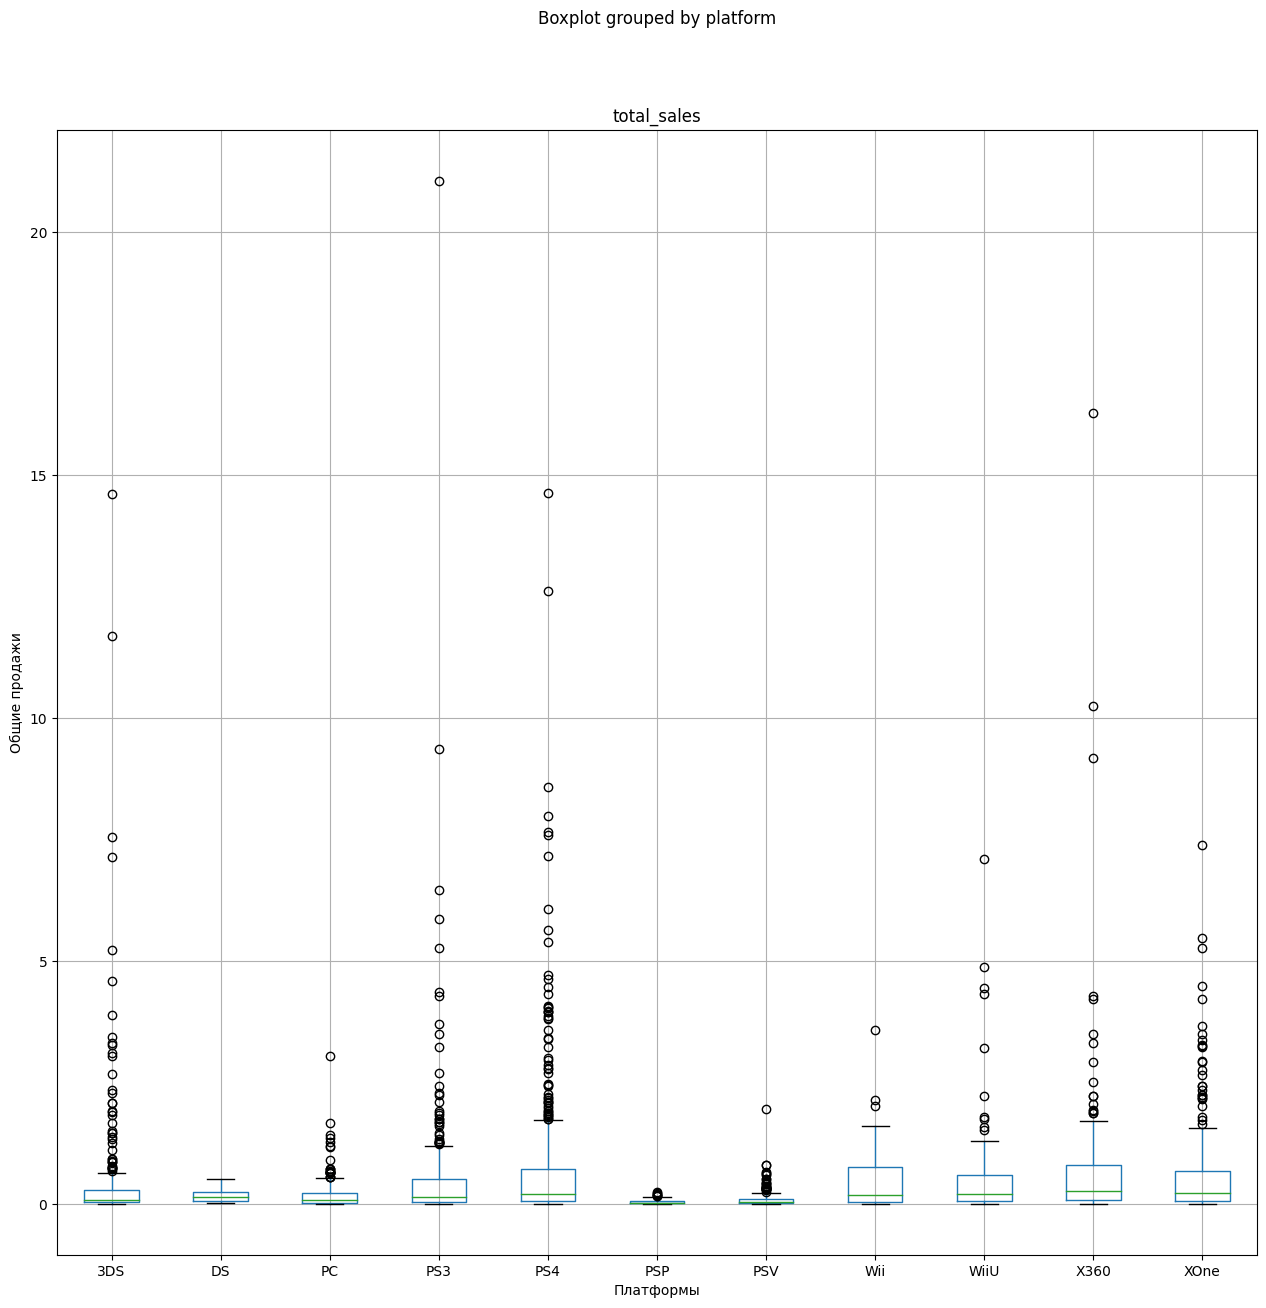

In [70]:
forsen.boxplot(column=['total_sales'], by='platform', figsize=(15,15))
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

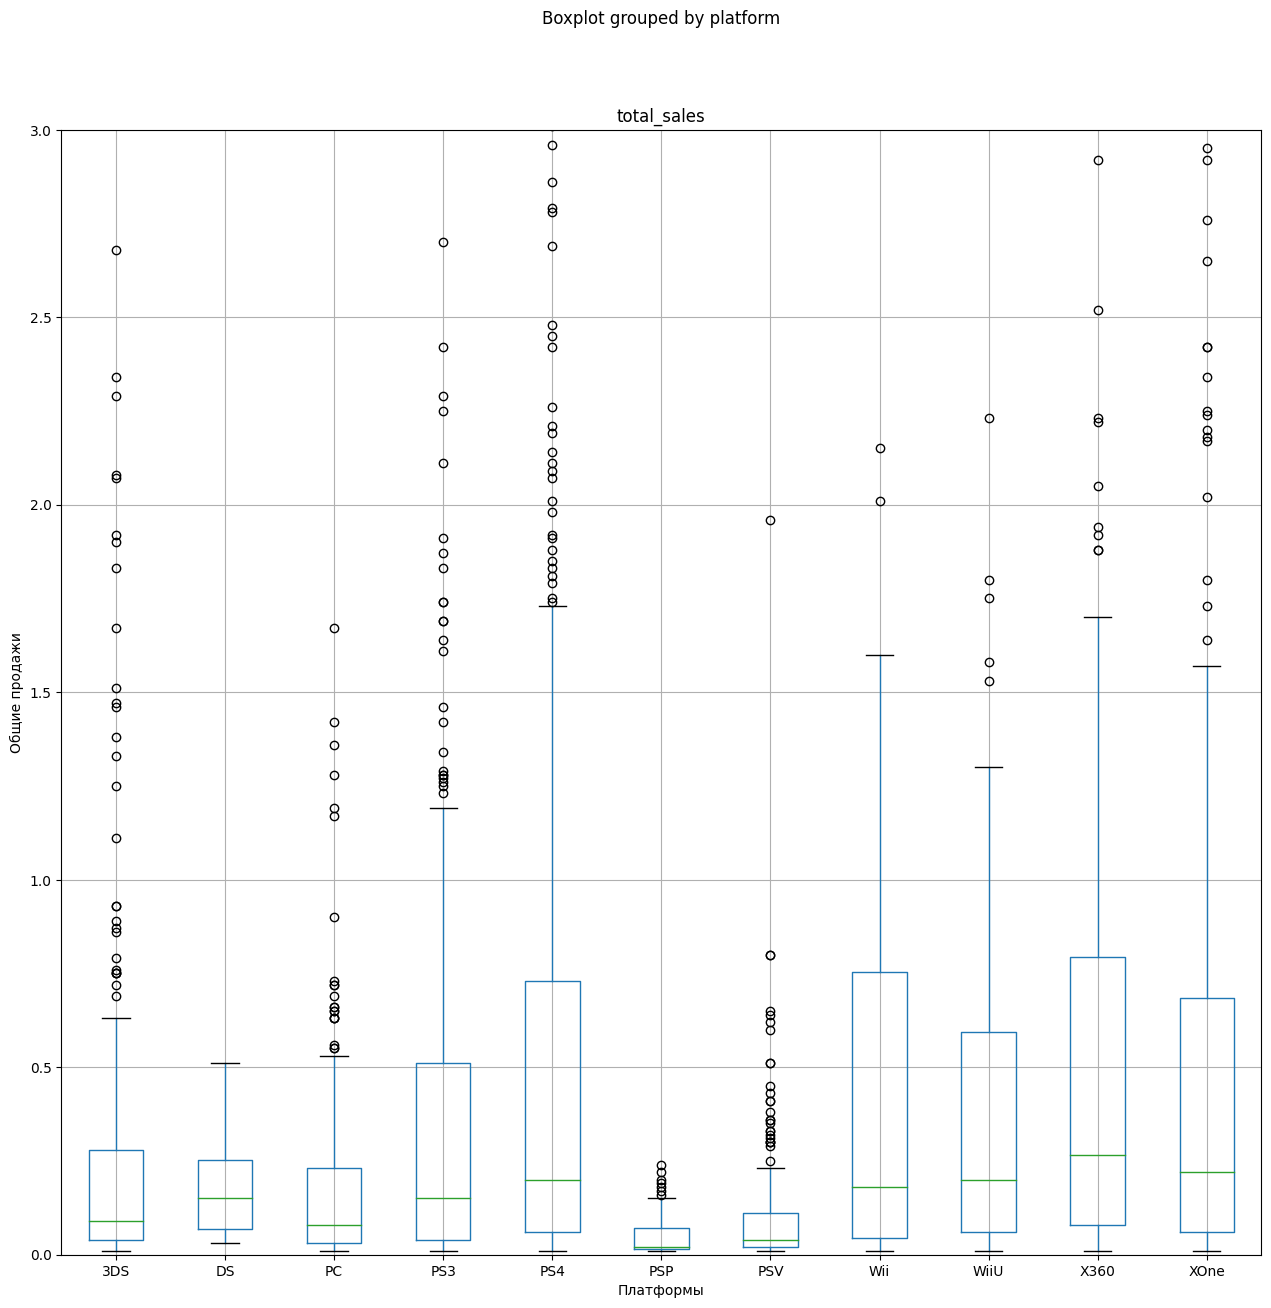

In [71]:
forsen.boxplot(column=['total_sales'], by='platform', figsize=(15,15))
plt.ylim(0, 3)
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

Приведём построенные ранее в анализе диаграммы размаха по продажам на различных платформах. Мы видим, что самые низкие медианы продаж у PSP и PSV. Следом идут PC и 3DS, у второй гораздо больше успешно проданных игр. Платформы Wii и WiiU имеют примерно одинаковое распределение. Медианное PS3 меньше, чем у XBox 360, однако более успешных игр и игр в целом на неё вышло больше. Самые успешные продажи пришлись на PS4 и XOne, медианное у этих двух платформ прим. одинаковое. Наиболее успешная игра на PS4 (COD Black Ops III, 14.6 млн.). На втором месте по этому показателю XOne - 7.4 млн. В целом распределение наиболее успешно проданных игр находится на PS4, основная масса значений от ~1.8 млн. до 4 млн., похуже на XOne - от ~1.5 до 3.3 млн. 

Чтобы выяснить как, и влияют ли вообще, на продажи внутри одной популярной платформы отзывы пользователей и критиков, мы построили диаграммы рассеяния для некоторых платформ из актуального периода и посчитали корреляцию между отзывами и продажами.

Видна некая корреляция между оценкой критиков и кол-м проданных копий на PS4. До 60 баллов лишь одна игра продалась почти в 2 млн. копий, между 60-70 баллов таких игр уже почти 4. Начиная с 70 баллов 1 игра почти добралась до отметки в 6 млн. проданных копий, заметно больше продалось тиражом 2-4 млн. На отрезке 80-90 4 шт. продались тиражом от 6 до 8 млн. и одной даже удалось почти достичь отметки в 9 млн. копий. Игра, получившая оценку в 97/100 продалась лучше всех - 12,62 млн. копий - GTA V.  
Продажи игр на PS4 не зависят от пользовательского рейтинга. Игры, получавшие оценку в диапазоне от 40 до 70 баллов, продавались успешнее, нежели более высокооцененные проекты.  

По диаграмме рассеяния для XOne зависимость видна практически аналогично, как для PS4. Корреляция между продажами и оценкой критиков 41,7%. Корреляция между продажами и оценкой игроков отсутствует.  

Диаграмма рассеяния зависимости оценки критиков и общих продаж на ПК не так сильно отражает корреляцию между значениями. Значение корреляции между продажами и оценкой критиков для ПК - 20%. Существует оч. маленькая обратная корреляция между продажами и оценкой пользователей на пк - -9%.

Ситуация с Хbox 360 такова, что более-менее успешные игры имеют оценку критиков 70+, значение корреляции между оценкой и общими продажами 35%. Корреляция между продажами и оценкой пользователей отсутствует.  

Результаты PS3 аналогичны Xbox 360, значение корреляции между оценкой и общими продажами 33%. Корреляция между продажами и оценкой пользователей отсутствует.  

У игр, выпущенных на Wii отсутствуют оценки критиков, а по небольшому кол-ву данных оценок игроков, есть сильная корреляция между ними и общими продажами - 68%.  

В случае с платформой 3DS наблюдается корреляция между продажами и оценками критиков, так и оценками пользователей. 36% и 24% соответственно.  

Если соотнести выводы по PS4 с результатами по остальным платформам, то можно сказать следующее: \
На PS4 корреляция между общими продажами и оценками критиков - 41%, уступает только Xbox One (42%) и Wii (68%). Корреляция между общими продажами и оценками игроков отсутствует. Данная корреляция присутствует только у 3DS и равняется 24%. У ПК самая низкая корреляция общих продаж и оценок критиков - 19%. У 3DS, Xbox 360 и PS3 она прим. одинакова - 36%,35% и 33% соответственно.

Затем мы нашли самые прибыльные жанры и выделим жанры с высокими и низкими продажами.  
Общее кол-во жанров: 12  
Самым прибыльным жанром является шутер (shooter), 233 млн. (21.4%) проданных копий 187 различных игр (8.4% от общего числа). Имеет самое высокое медианное значение, третий квартиль выше, чем у всех остальных на графике, наибольшее кол-во успешно проданных игр, хотя самые успешные все же игра не данного жанра. На втором месте экшн (action) - 322 млн. (29.5%) копий, 766 выпущенных игр (34% от общего числа). Медианное значение данного жанра далеко не на самом высоком месте, однако общее кол-во достаточно успешных игр принадлежит именно этому жанру, более того самая продаваемая игра также является жанром экшн. На третьем месте спортивные симуляторы - 151 млн. продаж (14%) и 214 выпущенных игр (9.6%). Медианное значение на первом месте после шутеров. Распределение успешных игр по продажам на третьем месте после шутеров и экшна. Три данных жанра в сумме занимают почти 2/3 общей доли рынка и более половины из общего числа выпущенных игр в рассматриваемом периоде. Самый худший результат у адвенчур - 24 млн. продаж и 245 различных игр (2.2% и 11% соответственно). Самое низкое медианное значение и наибольшее кол-во самых провальных игр по продажам.

После мы составили портрет пользователя из каждого представленного региона, определили самые популярные платформы (топ-3), самые популярные жанры (топ-5) и выяснили, влияет ли рейтинг ESRB на продажи в отдельном регионе.

#### Платформы в Северной Америке по популярности:
* 1 место - PS4, доля продаж 24.8% (108.7 млн.)
* 2 место - XOne, доля продаж 21.3% (93.1 млн.)
* 3 место - X360, доля продаж 18.7% (81.7 млн.)
* 4 место - PS3, доля продаж 14.5% (63.5 млн.)
* 5 место - 3DS, доля продаж 8.7% (38.2 млн.) 
  
#### Жанры в Северной Америке по популярности:
* 1 место - экшн, доля продаж 28.8% (126.05 млн.)
* 2 место - шутер, доля продаж 25.1% (109.7 млн.)
* 3 место - спортивные симуляторы, доля продаж 14.9% (65.3 млн.)
* 4 место - РПГ, доля продаж 10.6% (46.4 млн.)
* 5 место - misc, доля продаж 6.3% (27.5 млн.)
  
#### Платформы в Европе по популярности:
* 1 место - PS4, доля продаж 36% (141.09 млн.)
* 2 место - PS3, доля продаж 17.3% (67.81 млн.)
* 3 место - XOne, доля продаж 13.2% (51.59 млн.)
* 4 место - X360, доля продаж 10.8% (42.52 млн.)
* 5 место - 3DS, доля продаж 7.9% (30.96 млн.)

#### Жанры в Европе по популярности:
* 1 место - экшн, доля продаж 30.1% (118.13 млн.)
* 2 место - шутер, доля продаж 22.4% (87.86 млн.)
* 3 место - спортивные симуляторы, доля продаж 15.4% (60.52 млн.)
* 4 место - РПГ, доля продаж 9.4% (36.97 млн.)
* 5 место - Гонки, доля продаж 5.1% (20.19 млн.)  

#### Платформы в Японии по популярности:
* 1 место - 3DS, доля продаж 48.2% (67.81 млн.)
* 2 место - PS3, доля продаж 16.6% (23.35 млн.)
* 3 место - PSV, доля продаж 13.2% (18.59 млн.)
* 4 место - PS4, доля продаж 11.3% (15.96 млн.)
* 5 место - WiiU, доля продаж 7.7% (10.88 млн.)

#### Жанры в Японии по популярности:
* 1 место - РПГ, доля продаж 36.3% (51.04 млн.)
* 2 место - экшн, доля продаж 28.8% (40.49 млн.)
* 3 место - misc, доля продаж 6.5% (9.20 млн.)
* 4 место - файтинги, доля продаж 5.4% (7.65 млн.)
* 5 место - шутер, доля продаж 4.7% (6.61 млн.)  

**Распределение продаж по платформам в трёх регионах**  
В Северной Америке в Топ-5 платформ по убыванию - PS4, XOne, X360, PS3 и 3DS;
В Европе Топ-5 платформ по убыванию - PS4, PS3, XOne, X360, 3DS;
В Японии Топ-5 платформ по убыванию - 3DS, PS3, PSV, PS4, WiiU;

В NA и EU топ-5 состоит из одинаковых платформ, существуют некоторые различия в их долях и иерархии на рынке. В Японии свой собственный топ платформ.

**Распределение продаж по жанрам в трёх регионах**  
В Северной Америке в Топ-5 жанров по убыванию - экшн, шутер, спортивные симуляторы, РПГ, misc;
В Европе Топ-5 жанров по убыванию - экшн, шутер, спортивные симуляторы, РПГ, гонки;
В Японии Топ-5 жанров по убыванию - РПГ, экшн, misc, файтинги, шутеры;

В NA и EU топ-5 состоит и 4-х одинаковых жанров, различие лишь в том, что в NA misc замыкает топ, а в EU это гонки. В остальном топ-5 одинаковый для обоих регионов. В Японии опять же собственный топ-5 жанров игр - на первом месте РПГ, потом экшн, потом misc, следом файтинги и на последнем месте у нас шутеры.

**Влияние рейтинга ESRB на продажи в трёх регионах**  
В Европе и Северной Америке каждая категория рейтинга занимает одинаковое место в доле продаж. В Японии своё распределение, значительно отличающееся от двух других регионов.

И, наконец, мы проверили две гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В первом случае, по результатам т-теста нулевая гипотеза была отвергнута, средние пользовательские рейтинги платформ XOne и PC различаются.  
Во втором случае по результатам т-теста мы с уверенностью отвергли нулевую гипотезу, сделав вывод в пользу того, что средние пользовательские рейтинги жанров Action и Sports разные.